Nome: Igor Tauscher Martynetz

# Table of contents
1. [Resumo](#Resumo)
2. [Abordagem](#abordagem)
3. [Importando bibliotecas](#bibliotecas)
    1. [Importando datasets](#imp_data)
4. [Limpeza de dados](#limp_dados)
    1. [Remoção de Nan](#nan_remove)
5. [Exploração dos dados.](#data_explo)
    1. [Análise PM2.5](#PM2.5)
        1. [Análise geral](#geral_2.5)
        2. [Análise por cidade](#citys_2.5)
    2. [Análise PM10](#pm_10)
        1. [Análise geral](#geral_10)
        2. [Análise por cidade](#citys_10)
6. [Conclusão](#conclusão)

# Resumo <a name="Resumo"></a>

A escolha de usar Python para fazer a análise é pela familiaridade com a linguagem, e o uso do jupyter notebook é pelo fato de se poder deixar mais organizado os dados.

O conjunto de dados fornecido será utilizado para análise dos poluentes particulados MP2.5 e PM10.


Segundo a EPA, o material particulado (PM) pode ser dividido em duas categorias. O PM2,5 é formado por partículas cujo tamanho chega até 2,5 micrômetros e pode ser encontrado em nevoeiros e na fumaça. Já o PM10, com partículas de tamanho entre 2,5 e 10 micrômetros, pode ser encontrado em regiões próximas a indústrias.

1. The level of the 2012 PM2.5 annual NAAQS is 12.0 micrograms per cubic meter (μg/m3) for primary (health-related) considerations.  The design value for the annual PM2.5 NAAQS is the 3-year average annual mean concentration.  To be comparable to the NAAQS, the design value must be valid (i.e. meet minimum completeness criteria using Federal Reference Method or equivalent data).
2. The level of the 2006 24-hour NAAQS for PM2.5 is 35 micrograms per cubic meter (μg/m3).  The design value for the 24-hour PM2.5 NAAQS is the 3-year average 98th percentile concentration.  To be comparable to the NAAQS, the design value must be valid (i.e. meet minimum completeness criteria using Federal Reference Method or equivalent data). 

3. The level of the 1987 NAAQS for PM10 is 150 micrograms per cubic meter (µg/m3).  The NAAQS metric for the PM10 NAAQS is the 3-year average expected number of exceedances (ENE).  To be comparable to the NAAQS, the design value must be valid (i.e. meet minimum completeness criteria using Federal Reference Method or equivalent data).

Dados extraido de https://www.epa.gov/air-trends/air-quality-design-values

|PM2.5 | Air Quality Index | PM2.5 Health Effects | Precautionary Actions|
|------|------|------|------|
|0 to 12.0|Good 0 to 50|Little to no risk.	|None.|
|12.1 to 35.4|Moderate 51 to 100|Unusually sensitive individuals may experience respiratory symptoms. | Unusually sensitive people should consider reducing prolonged or heavy exertion.|
|35.5 to 55.4|Unhealthy for Sensitive Groups 101 to 150|Increasing likelihood of respiratory symptoms in sensitive individuals, aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly.|People with respiratory or heart disease, the elderly and children should limit prolonged exertion.|
|55.5 to 150.4|Unhealthy 151 to 200|Increased aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; increased respiratory effects in general population.|People with respiratory or heart disease, the elderly and children should avoid prolonged exertion; everyone else should limit prolonged exertion.|
|150.5 to 250.4|Very Unhealthy 201 to 300|Significant aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; significant increase in respiratory effects in general population.|People with respiratory or heart disease, the elderly and children should avoid any outdoor activity; everyone else should avoid prolonged exertion.|
|250.5 to 500.4|Hazardous 301 to 500|Serious aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; serious risk of respiratory effects in general population.|Everyone should avoid any outdoor exertion; people with respiratory or heart disease, the elderly and children should remain indoors.|

# Abordagem <a name="abordagem"></a> 

Para análise será abordado predição da série temporal para determinar se existe uma diminuição ou não ao longo do ano dos índices de poluentes PM2.5 e PM10, bem como observar se existem épocas do ano na qual existe um maior ou menor acúmulo desses poluentes, tanto em vista de todas cidades como uma só, tanto quanto as cidades individuais.

Outra análise que será feita, é através de um teste ANOVA para determinar se as cidades tem médias e desvio padrão semelhantes (null hipótese) ou pelo menos uma apresenta diferença (hipótese alternativa).

# Importando bibliotecas <a name="bibliotecas"></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from windrose import WindroseAxes
import matplotlib.cm as cm
sns.set(style="whitegrid") 

/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3

## Importando datasets <a name="imp_data"></a>

Attribute Information:
* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site

In [2]:
data_aotizhongxin = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data_changping = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
data_dingling = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
data_dongsi = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
data_guanyuan = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
data_gucheng = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
data_huairou = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
data_nongzhanguan = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data_shunyi = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
data_tiantan = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
data_wanliu = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
data_wanshouxigong = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

# Limpeza de dados. <a name="limp_dados"></a>

Antes de juntar os dataframes mais fácil análizar os Nan values

In [3]:
print("aotizhongxin")
print(round(data_aotizhongxin.isnull().sum()/len(data_aotizhongxin.index), 4)*100)
print("\n")

print("changping")
print(round(data_changping.isnull().sum()/len(data_changping.index), 4)*100)
print("\n")

print("dingling")
print(round(data_dingling.isnull().sum()/len(data_dingling.index), 4)*100)
print("\n")

print("dongsi")
print(round(data_dongsi.isnull().sum()/len(data_dongsi.index), 4)*100)
print("\n")

print("guanyuan")
print(round(data_guanyuan.isnull().sum()/len(data_guanyuan.index), 4)*100)
print("\n")

print("gucheng")
print(round(data_gucheng.isnull().sum()/len(data_gucheng.index), 4)*100)
print("\n")

print("huairou")
print(round(data_huairou.isnull().sum()/len(data_huairou.index), 4)*100)
print("\n")

print("nongzhanguan")
print(round(data_nongzhanguan.isnull().sum()/len(data_nongzhanguan.index), 4)*100)
print("\n")

print("shunyi")
print(round(data_shunyi.isnull().sum()/len(data_shunyi.index), 4)*100)
print("\n")

print("tiantan")
print(round(data_tiantan.isnull().sum()/len(data_tiantan.index), 4)*100)
print("\n")

print("wanliu")
print(round(data_wanliu.isnull().sum()/len(data_wanliu.index), 4)*100)
print("\n")

print("wanshouxigong")
print(round(data_wanshouxigong.isnull().sum()/len(data_wanshouxigong.index), 4)*100)
print("\n")

aotizhongxin
No         0.00
year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.64
PM10       2.05
SO2        2.67
NO2        2.92
CO         5.07
O3         4.90
TEMP       0.06
PRES       0.06
DEWP       0.06
RAIN       0.06
wd         0.23
WSPM       0.04
station    0.00
dtype: float64


changping
No         0.00
year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.21
PM10       1.66
SO2        1.79
NO2        1.90
CO         4.34
O3         1.72
TEMP       0.15
PRES       0.14
DEWP       0.15
RAIN       0.15
wd         0.40
WSPM       0.12
station    0.00
dtype: float64


dingling
No         0.00
year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.22
PM10       1.87
SO2        2.08
NO2        3.52
CO         5.74
O3         3.46
TEMP       0.15
PRES       0.14
DEWP       0.15
RAIN       0.15
wd         0.40
WSPM       0.12
station    0.00
dtype: float64


dongsi
No         0.00
year       0.00
month      0.0

In [4]:
data_aotizhongxin.loc[1507:1511,]

No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
1507  1508  2013      5    2    19   87.0  179.0  63.0   71.0  1000.0  80.0   
1508  1509  2013      5    2    20   82.0  183.0  61.0   83.0  1000.0  61.0   
1509  1510  2013      5    2    21    NaN  183.0  63.0   93.0  1200.0  38.0   
1510  1511  2013      5    2    22  166.0  176.0  57.0  103.0  1200.0  24.0   
1511  1512  2013      5    2    23   90.0  138.0  49.0   76.0   800.0  39.0   

      TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
1507  20.2  1004.3   6.9   0.0  ESE   2.2  Aotizhongxin  
1508  19.2  1005.4   6.6   0.0   SE   2.8  Aotizhongxin  
1509  18.5  1006.1   6.0   0.0   SE   2.8  Aotizhongxin  
1510  17.9  1006.7   6.7   0.0  ENE   1.4  Aotizhongxin  
1511  17.0  1008.2   6.2   0.0  ENE   0.7  Aotizhongxin

Observando os valores ao redor do Nan em PM2.5 não se consegue tirar alguma conclusão de um valor lógico a ser substituído. Pelo fato que a concentração de poluentes depende de vários fatores, como direção do vento (carregando ou removendo os poluentes daquela região), e pressão atmosférica (que influencia na direção do vento), bem como a velocidade do vento pode influência na pressão (efeito Bernoulli).

A mesma coisa serve para outras colunas numéricas, existe uma dependência Física entre elas, e uma equação para prever isso está fora de cogitação, pois seria um modelo não linear, que é dependente de várias condições iniciais, que não tenho acesso (trabalho feito por Lorentz, início de estudos de sistemas caóticos foi justamente com previsão meteorológica)

Como temos % de Nan values em CO (que é a coluna que mais falta)
* aotizhongxin   $\approx$ 5,7%
* changping      $\approx$ 4,34%
* dingling       $\approx$ 5,74%
* dongsi         $\approx$ 9,12%
* guanyuan       $\approx$ 5%
* gucheng        $\approx$ 4%
* huairou        $\approx$ 4,06%
* nongzhanguan   $\approx$ 3,44%
* shunyi         $\approx$ 6,21%
* tiantan        $\approx$ 3,21%
* wanliu         $\approx$ 5,17%
* wanshouxigong  $\approx$ 3,70%

Isso dá uma média de $\approx$ 4,97% de dados miss nessa coluna (que é a que tem mais valores faltando), e uma substituição pela média não afetaria o conjunto total, pois em torno 95% dos dados ainda estariam preservados.


## Remoção de Nan <a name="nan_remove"></a>

### Remoção de Nan nas colunas numéricas.

In [5]:
col_nan = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df = [data_aotizhongxin, data_changping, data_dingling, data_dongsi, data_guanyuan,
      data_gucheng, data_huairou, data_nongzhanguan, data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong]

In [6]:
for d in df:
    for col in col_nan:
        d[col].fillna(d[col].median(), inplace=True)

### Remoção de Nan na coluna WD

Existe uma biblioteca em python chamada Windeose, ela é uma ferramenta gráfica que é usado por meteorologistas que te mostra a distribuição da velocidade do vento e da direção de um local 

Para instalar essa biblioteca só usar

pip install windrose

Para melhor trabalhar com WD bom é converter eles em ângulos, temos

In [7]:
angulos_wd = {"N":360,
              "NNE":22.5,
              "NE":45,
              "ENE":67.5,
              "E":90,
              "ESE":112.5,
              "SE":135,
              "SSE":157.5,
              "S":180,
              "SSW":202.5,
              "SW":225,
              "WSW":247.5,
              "W":270,
              "WNW":292.5,
              "NW":315,
              "NNW":337.5}

In [8]:
data_aotizhongxin['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [9]:
for d in df:
    d['wd'] = d['wd'].apply(lambda x: x if pd.isnull(x) else angulos_wd[x])

In [10]:
data_aotizhongxin['wd'].unique()

array([337.5, 360. , 315. ,  22.5,  67.5,  90. ,  45. , 270. , 202.5,
       247.5, 135. , 292.5, 157.5, 112.5, 180. , 225. ,   nan])

In [11]:
data_aotizhongxin[data_aotizhongxin.wd.isna()].head()

No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO     O3  \
6388    6389  2013     11   22     4   82.0   74.0  15.0  75.0  1300.0   42.0   
11718  11719  2014      7    2     6   44.0   44.0   2.0  16.0   800.0  105.0   
13412  13413  2014      9   10    20   56.0  141.0  13.0  81.0   700.0   99.0   
16748  16749  2015      1   27    20   26.0   42.0  12.0  78.0  1300.0    2.0   
17263  17264  2015      2   18     7   13.0   14.0  12.0  22.0   600.0   60.0   

       TEMP    PRES  DEWP  RAIN  wd  WSPM       station  
6388   -3.2  1020.5  -4.0   0.0 NaN   0.1  Aotizhongxin  
11718  21.5   998.2  21.5   0.1 NaN   0.2  Aotizhongxin  
13412  21.7  1008.0  15.8   0.0 NaN   0.0  Aotizhongxin  
16748  14.5  1011.4   3.8   0.0 NaN   1.4  Aotizhongxin  
17263  14.5  1011.4   3.8   0.0 NaN   1.4  Aotizhongxin

O primeiro valor nan para aotizhongxin é as 4h, observando como é a distribuição de velocidade de vento e direção nessa hora temos

In [12]:
data_aotizhongxin[data_aotizhongxin.hour==4].groupby("wd").count().idxmax().values[0] 

45.0

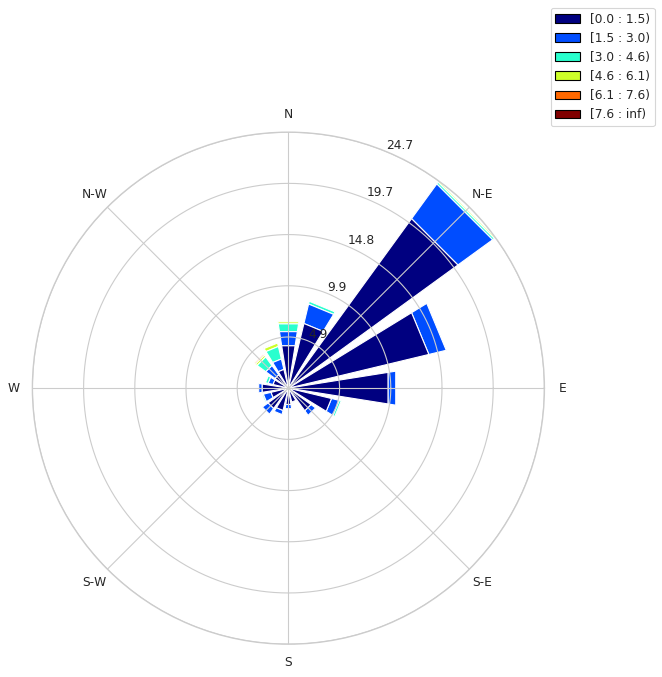

In [13]:
wd = data_aotizhongxin.loc[data_aotizhongxin.hour==4,'wd']
ws = data_aotizhongxin.loc[data_aotizhongxin.hour==4,'WSPM']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(bbox_to_anchor=(1, 1))

Então observa-se que existe uma predominância de ventos na direção NE.

Para as 20h, que é aonde se tem outro Nan

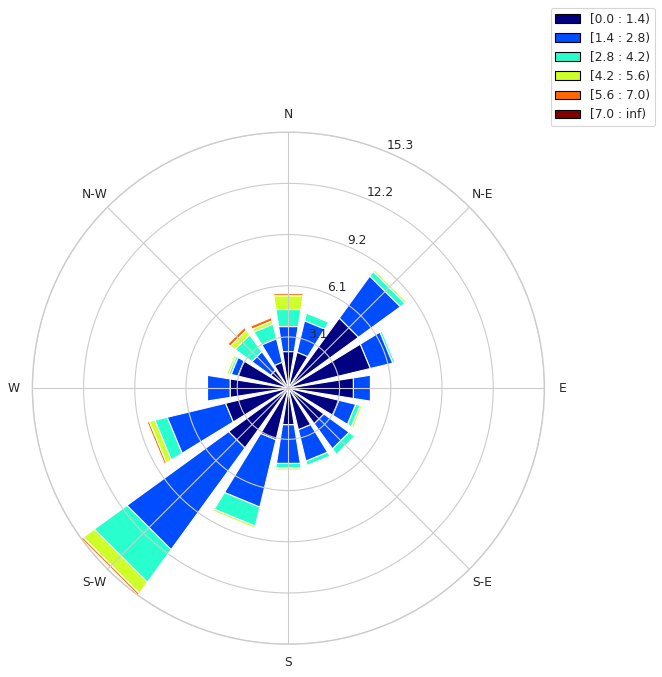

In [14]:
wd = data_aotizhongxin.loc[data_aotizhongxin.hour==20,'wd']
ws = data_aotizhongxin.loc[data_aotizhongxin.hour==20,'WSPM']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(bbox_to_anchor=(1, 1))

Nesse caso observa-se uma predominância de ventos na direção SW, então podemos substituir os valores de NaN pelo máximo de ocorrência no mesmo horário.

In [15]:
for d in df:
    for hour, i in zip(d.loc[d.wd.isna(), 'hour'],
                       d[d.wd.isna()].index):

        most_count = d[d.hour==hour].groupby("wd").count().idxmax().values[0]
        d.loc[i,'wd'] = most_count

## Juntanto todos dataframes

In [16]:
df = [data_aotizhongxin, data_changping, data_dingling, data_dongsi, data_guanyuan,
      data_gucheng, data_huairou, data_nongzhanguan, data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong]
all_data = pd.concat(df,ignore_index=True) #<- index ignorado para não ter repetição de index

A coluna No nesse caso é redundânte, pois pode-se trabalhar com os index.

In [17]:
all_data.drop(columns=['No'],inplace=True)

Analisar se existes valores null ainda

In [18]:
round(all_data.isnull().sum()/len(all_data.index), 4)*100

year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Pode-se ver que todos os Nan foram removidos.

# Exploração dos dados. <a name="data_explo"></a>

Primeira análise a ser feita é ver como é a evolução por ano de cada poluente (PM2,5 e PM10) em cada cidade.

## Análise PM2.5 <a name="PM2.5"></a>

### Análise geral <a name="geral_2.5"></a>

Primeiro fazendo uma média diária dos poluentes em todas cidades

In [19]:
all_data['date']=pd.to_datetime(all_data[['year', 'month', 'day']])

In [20]:
daily_data = all_data.drop('hour', axis=1).groupby('date').mean()
daily_data.head()

year  month  day       PM2.5        PM10        SO2         NO2  \
date                                                                          
2013-03-01  2013      3    1    7.326389   12.586806   9.239583   23.680556   
2013-03-02  2013      3    2   31.475694   40.743056  31.671072   56.536402   
2013-03-03  2013      3    3   79.291667  111.104167  49.232639   75.753472   
2013-03-04  2013      3    4   22.170139   40.795139  18.771817   42.951803   
2013-03-05  2013      3    5  127.395833  159.236111  70.000000  100.565972   

                     CO         O3      TEMP         PRES       DEWP  RAIN  \
date                                                                         
2013-03-01   417.013889  67.944879  1.173958  1026.569792 -20.148611   0.0   
2013-03-02   946.833333  32.625418  0.260417  1026.552778 -16.271875   0.0   
2013-03-03  1769.232639  22.788194  5.257292  1014.215278 -12.325347   0.0   
2013-03-04   729.465278  56.833333  9.610764  1017.263194 -12.773264   0.0   
2013-03-05  2015.017361  79.527778  6.630556  1010.551389  -7.916319   0.0   

                    wd      WSPM  
date                              
2013-03-01  219.375000  2.917708  
2013-03-02  181.875000  1.145139  
2013-03-03  216.015625  1.463194  
2013-03-04  225.468750  2.227083  
2013-03-05  137.500000  0.992014

Para depois fazer uma média semanal

In [21]:
weekly_data = daily_data.resample('W').mean()

In [22]:
weekly_data.head()

year  month   day       PM2.5        PM10        SO2        NO2  \
date                                                                            
2013-03-03  2013.0    3.0   2.0   39.364583   54.811343  30.047765  51.990143   
2013-03-10  2013.0    3.0   7.0  127.418155  173.268849  54.256168  86.864985   
2013-03-17  2013.0    3.0  14.0  155.800595  165.898313  54.149802  83.291667   
2013-03-24  2013.0    3.0  21.0   61.516369   77.979167  16.282738  46.082837   
2013-03-31  2013.0    3.0  28.0  101.658234  129.341022  31.981422  58.834102   

                     CO         O3      TEMP         PRES       DEWP  \
date                                                                   
2013-03-03  1044.359954  41.119497  2.230556  1022.445949 -16.248611   
2013-03-10  1994.253968  71.200893  7.921974  1008.608036  -7.972123   
2013-03-17  1748.891369  72.194444  6.276538  1013.946478  -3.122867   
2013-03-24   883.432540  48.548576  4.453819  1009.503224  -6.526091   
2013-03-31  1211.178571  39.839088  6.928819  1012.459077  -5.007341   

                RAIN          wd      WSPM  
date                                        
2013-03-03  0.000000  205.755208  1.842014  
2013-03-10  0.000000  188.504464  1.878720  
2013-03-17  0.021280  165.156250  1.480060  
2013-03-24  0.083978  169.587054  2.288740  
2013-03-31  0.000000  157.064732  1.917163

In [23]:
weekly_data.shape

(210, 15)

In [24]:
weekly_data.drop(columns=['year','month','day'],inplace=True)

/home/igor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


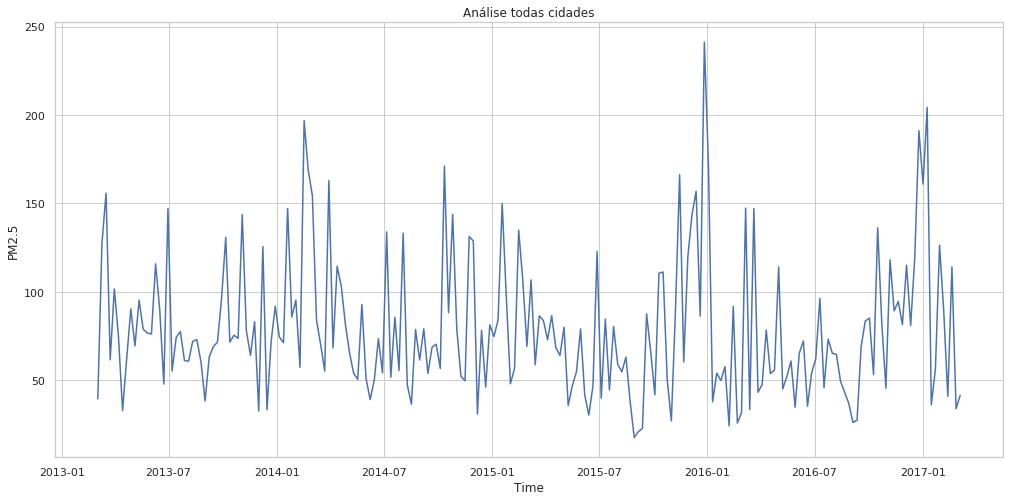

In [25]:
def plot_data(data, col, title):
    plt.figure(figsize=(17, 8))
    plt.plot(data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.title(title)
            
plot_data(weekly_data,"PM2.5", "Análise todas cidades")

In [26]:
cols_to_drop_2_5 = ['PM10','SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

weekly_data_pm2_5 = weekly_data.drop(cols_to_drop_2_5, axis=1)
weekly_data_pm2_5.head()

PM2.5
date                  
2013-03-03   39.364583
2013-03-10  127.418155
2013-03-17  155.800595
2013-03-24   61.516369
2013-03-31  101.658234

Prophet é uma biblioteca open source baseada em scipy que faz análises de predição bem robustas em séries temporais. É uma biblioteca que existe tanto para Python como para R https://facebook.github.io/prophet/docs/quick_start.html

In [27]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [28]:
df = weekly_data_pm2_5.reset_index()
df.columns = ['ds', 'y']
df.head()

ds           y
0 2013-03-03   39.364583
1 2013-03-10  127.418155
2 2013-03-17  155.800595
3 2013-03-24   61.516369
4 2013-03-31  101.658234

Com prophet pode-se adicionar como regressor condições de ambiente, como temperatura, vento, pressão e etc

Remover os 30 últimos dias do conjunto de dados, para ser usado como teste posteriormente, para poder analisar MAPE e MAE.

In [29]:
prediction_size = 30
train_df = df[:-prediction_size]
test_df = df[-prediction_size:]
m = Prophet(yearly_seasonality = True, 
            weekly_seasonality=True,
            seasonality_prior_scale=0.1)
m.fit(train_df)

future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

In [30]:
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-03-03  58.966523   59.393439  149.633842    58.966523    58.966523   
1 2013-03-10  58.869070   59.566435  146.401257    58.869070    58.869070   
2 2013-03-17  58.771617   53.135026  143.919607    58.771617    58.771617   
3 2013-03-24  58.674164   50.495241  138.597599    58.674164    58.674164   
4 2013-03-31  58.576711   47.557200  133.011194    58.576711    58.576711   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0       47.139687             47.139687             47.139687  28.563263   
1       43.327453             43.327453             43.327453  28.563263   
2       39.962225             39.962225             39.962225  28.563263   
3       35.826870             35.826870             35.826870  28.563263   
4       30.923565             30.923565             30.923565  28.563263   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0     28.563263     28.563263  18.576424     18.576424     18.576424   
1     28.563263     28.563263  14.764190     14.764190     14.764190   
2     28.563263     28.563263  11.398962     11.398962     11.398962   
3     28.563263     28.563263   7.263607      7.263607      7.263607   
4     28.563263     28.563263   2.360302      2.360302      2.360302   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  106.106210  
1                         0.0  102.196523  
2                         0.0   98.733842  
3                         0.0   94.501034  
4                         0.0   89.500277

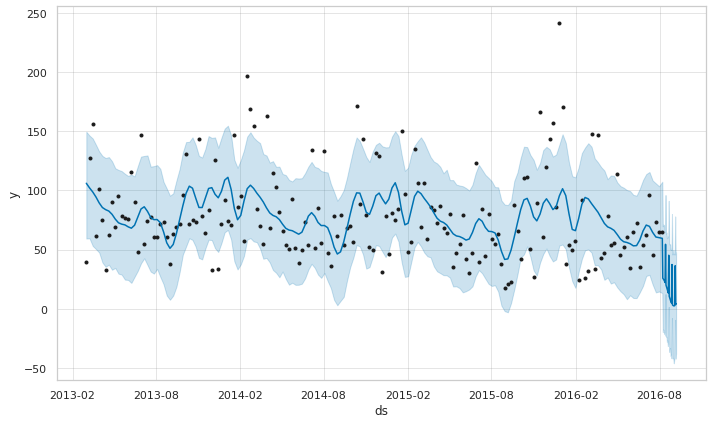

In [31]:
m.plot(forecast);

Os pontos em pretos são os valores reais da série temporal, a linha azul é a reta predita pelo modelo, e a área azul é o erro da medida.

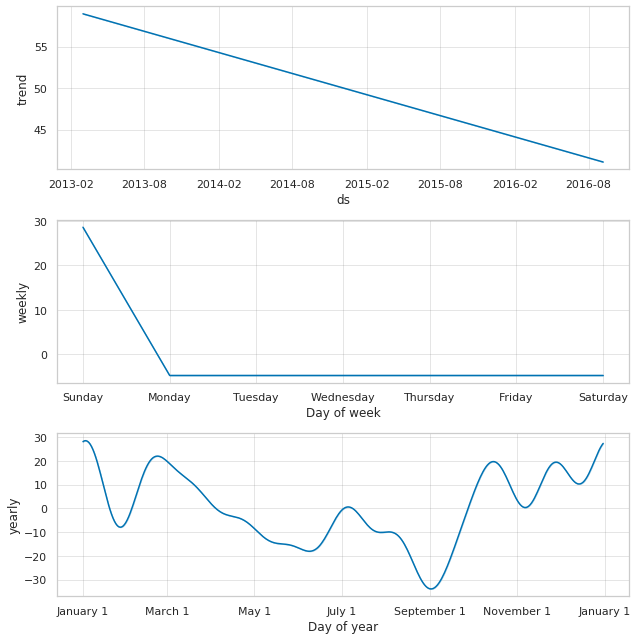

In [32]:
m.plot_components(forecast);

Em trend mostra que não existe uma periodicidade e sim um decaimento nos poluentes que é um bom sinal

yearly mostra a periodicidade anual de poluentes, pode-se ver que começo do ano, final de fevereiro meados de setembro e final de dezembro, existe um aumento desses poluentes. Dezembro e começo do ano esse aumento pode ser devido as férias, ocasionando um aumento de carros circulando.

In [33]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [34]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

yhat  yhat_lower  yhat_upper           y
ds                                                        
2013-03-03  106.106210   59.393439  149.633842   39.364583
2013-03-10  102.196523   59.566435  146.401257  127.418155
2013-03-17   98.733842   53.135026  143.919607  155.800595
2013-03-24   94.501034   50.495241  138.597599   61.516369
2013-03-31   89.500277   47.557200  133.011194  101.658234

In [35]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [36]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 13.999611134939759
MAE 4.514122356028917


MAPE (Mean absolute percentage error) nos mostra que modelo pode errar em 14% do valor real.

MAE (Mean absolute error) que o erro está em 4 unidades.

Mostrando assim que é um modelo confiável.

### Análise por cidade <a name="citys_2.5"></a>

O procedimento é o mesmo feito anteriormente, e para todas cidades serão iguais.

In [37]:
daily_data_aotiz = all_data[all_data.station=="Aotizhongxin"].drop('hour', axis=1).groupby('date').mean()
daily_data_chang = all_data[all_data.station=="Changping"].drop('hour', axis=1).groupby('date').mean()
daily_data_dingl = all_data[all_data.station=="Dingling"].drop('hour', axis=1).groupby('date').mean()
daily_data_dongs = all_data[all_data.station=="Dongsi"].drop('hour', axis=1).groupby('date').mean()
daily_data_guany = all_data[all_data.station=="Guanyuan"].drop('hour', axis=1).groupby('date').mean()
daily_data_guche = all_data[all_data.station=="Gucheng"].drop('hour', axis=1).groupby('date').mean()
daily_data_huair = all_data[all_data.station=="Huairou"].drop('hour', axis=1).groupby('date').mean()
daily_data_nongz = all_data[all_data.station=="Nongzhanguan"].drop('hour', axis=1).groupby('date').mean()
daily_data_shuny = all_data[all_data.station=="Shunyi"].drop('hour', axis=1).groupby('date').mean()
daily_data_tiant = all_data[all_data.station=="Tiantan"].drop('hour', axis=1).groupby('date').mean()
daily_data_wanli = all_data[all_data.station=="Wanliu"].drop('hour', axis=1).groupby('date').mean()
daily_data_wansh = all_data[all_data.station=="Wanshouxigong"].drop('hour', axis=1).groupby('date').mean()

In [38]:
def data_weakly(df):
    weekly = df.resample('W').mean()
    weekly.drop(columns=['year','month','day'],inplace=True)
    return weekly

Salvar conjunto separados já com valores tratados, pois será usado para análise do PM10 já

In [39]:
weekly_data_Aotizhongxin  = data_weakly(daily_data_aotiz)
weekly_data_Changping     = data_weakly(daily_data_chang)
weekly_data_Dingling      = data_weakly(daily_data_dingl)
weekly_data_Dongsi        = data_weakly(daily_data_dongs)
weekly_data_Guanyuan      = data_weakly(daily_data_guany)
weekly_data_Gucheng       = data_weakly(daily_data_guche)
weekly_data_Huairou       = data_weakly(daily_data_huair)
weekly_data_Nongzhanguan  = data_weakly(daily_data_nongz)
weekly_data_Shunyi        = data_weakly(daily_data_shuny)
weekly_data_Tiantan       = data_weakly(daily_data_tiant)
weekly_data_Wanliu        = data_weakly(daily_data_wanli)
weekly_data_Wanshouxigong = data_weakly(daily_data_wansh)

weakly_datas = [weekly_data_Aotizhongxin,weekly_data_Changping,weekly_data_Dingling,weekly_data_Dongsi,
                weekly_data_Guanyuan,weekly_data_Gucheng,weekly_data_Huairou,weekly_data_Nongzhanguan,
                weekly_data_Shunyi,weekly_data_Tiantan,weekly_data_Wanliu,weekly_data_Wanshouxigong]

cidades = ["Aotizhongxin", "Changping","Dingling", "Dongsi", "Guanyuan", 
           "Gucheng", "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", 
           "Wanliu", "Wanshouxigong"]

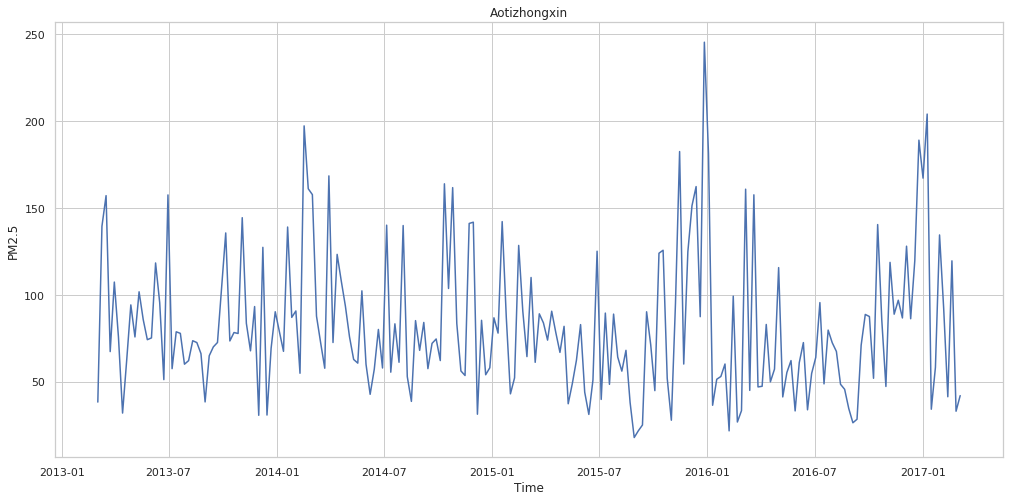

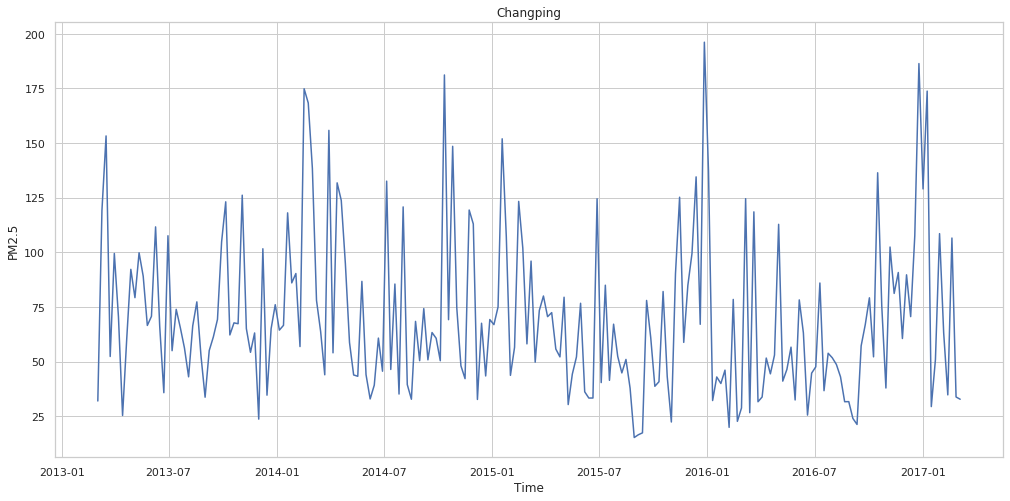

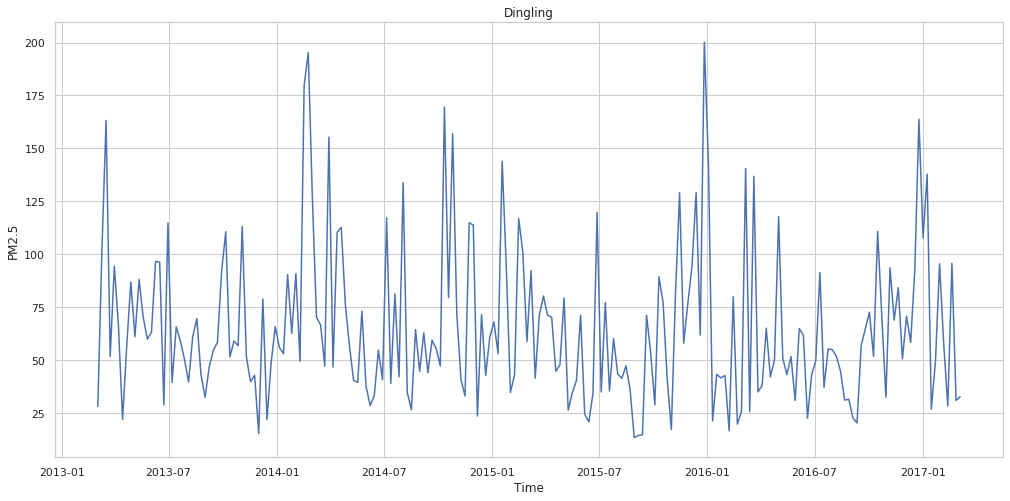

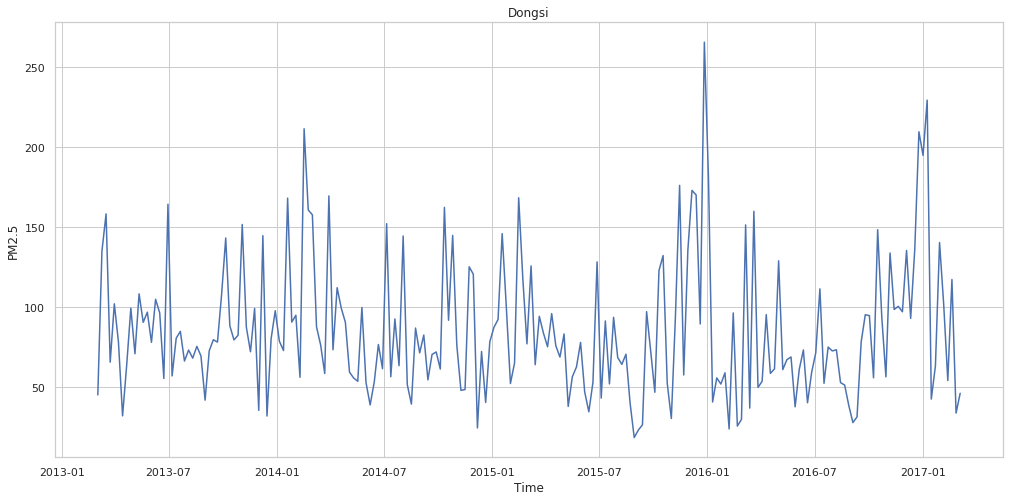

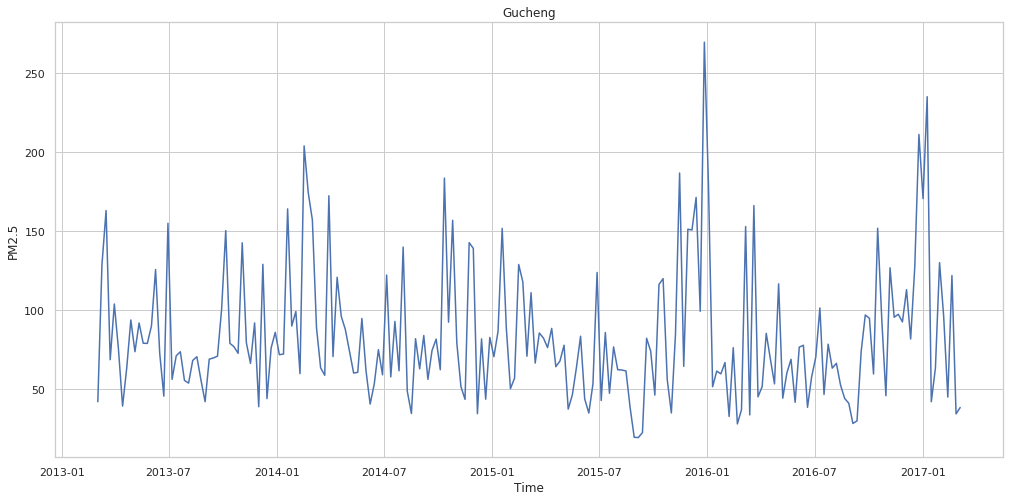

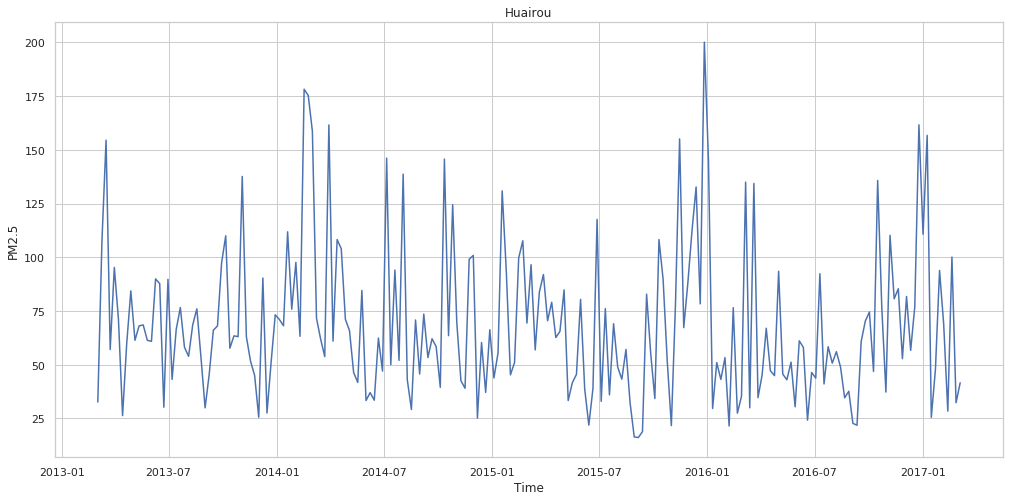

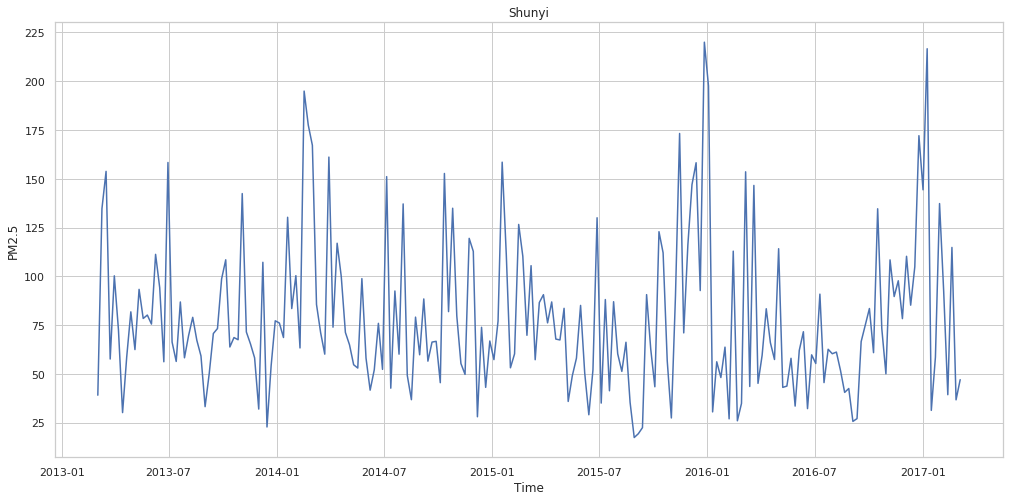

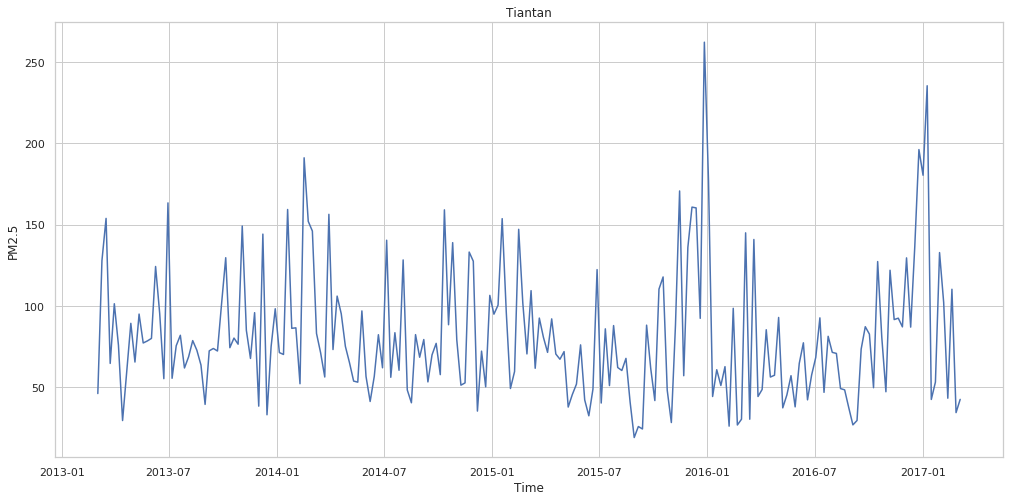

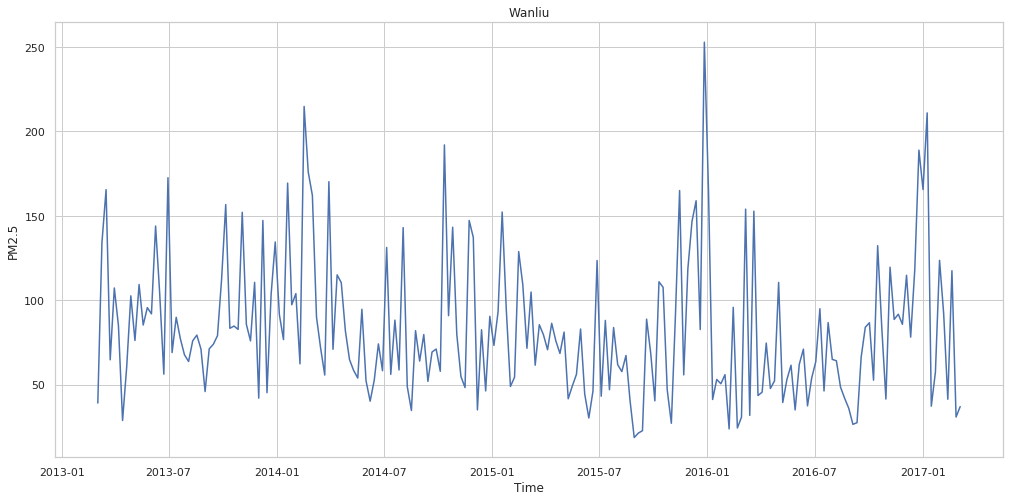

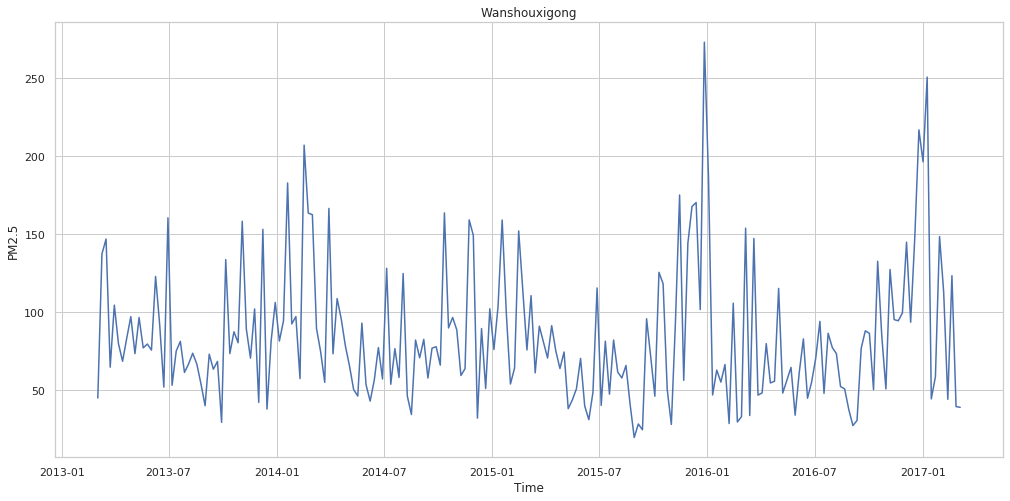

In [40]:
for dado, city in zip(weakly_datas,cidades):
    plot_data(dado,"PM2.5",city)

Pode-se observar que existe uma leve diferença entre cidades, então vamos ver como a partir de predição de série temporal se eles tem comportamentos diferentes.

In [41]:
def prophet_prediction(data, city,col):
    df = data.drop(col, axis=1)
    df = df.reset_index()
    df.columns = ['ds', 'y',]
    train_df = df[:-prediction_size]
    
    m = Prophet(yearly_seasonality = True, 
                weekly_seasonality=True,
                seasonality_prior_scale=0.1)
    
    m.fit(train_df)
    future = m.make_future_dataframe(periods=prediction_size)
    forecast = m.predict(future)
    print(f"cidade {city}")
    m.plot(forecast);
    m.plot_components(forecast);

cidade Aotizhongxin


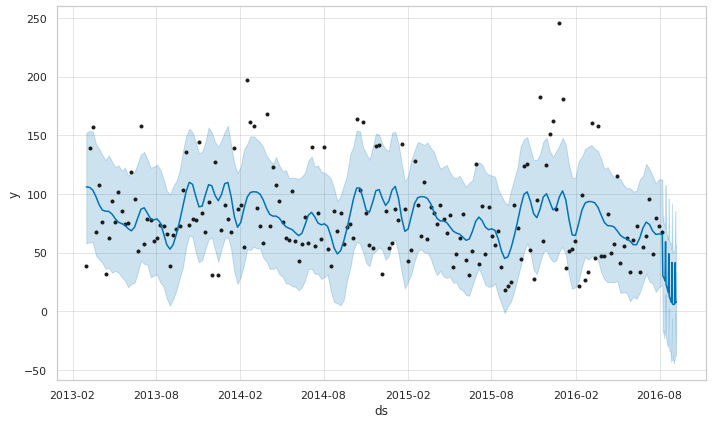

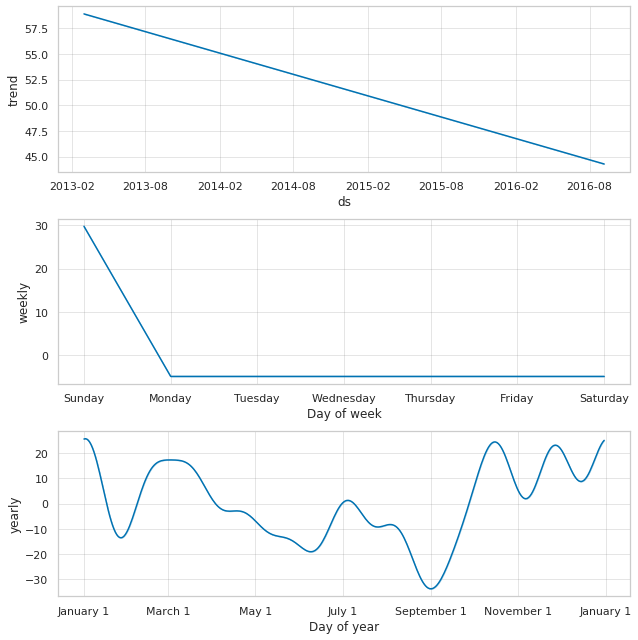

In [42]:
prophet_prediction(weekly_data_Aotizhongxin,"Aotizhongxin",cols_to_drop_2_5)

cidade Changping


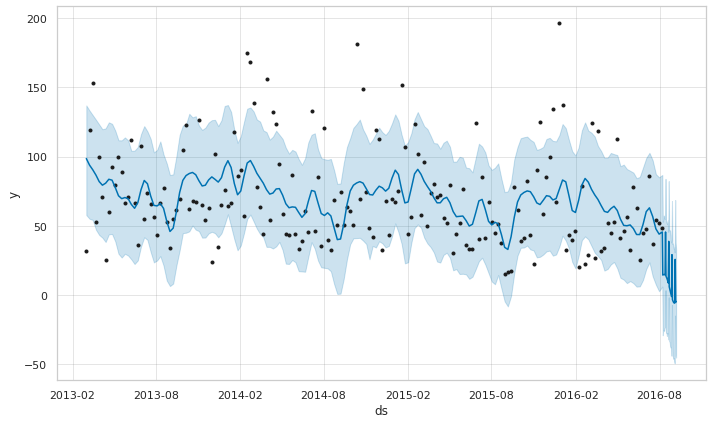

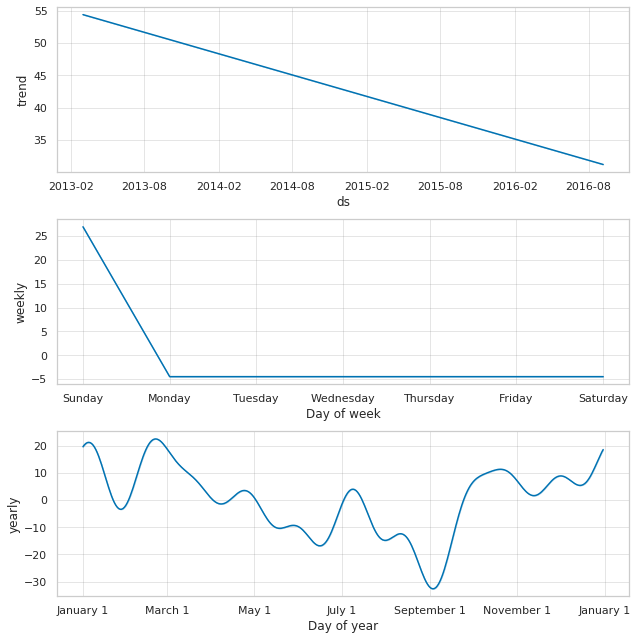

In [43]:
prophet_prediction(weekly_data_Changping,"Changping",cols_to_drop_2_5)

cidade Dingling


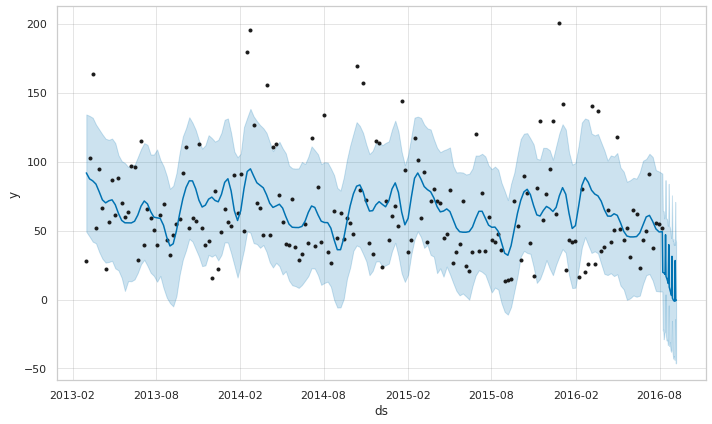

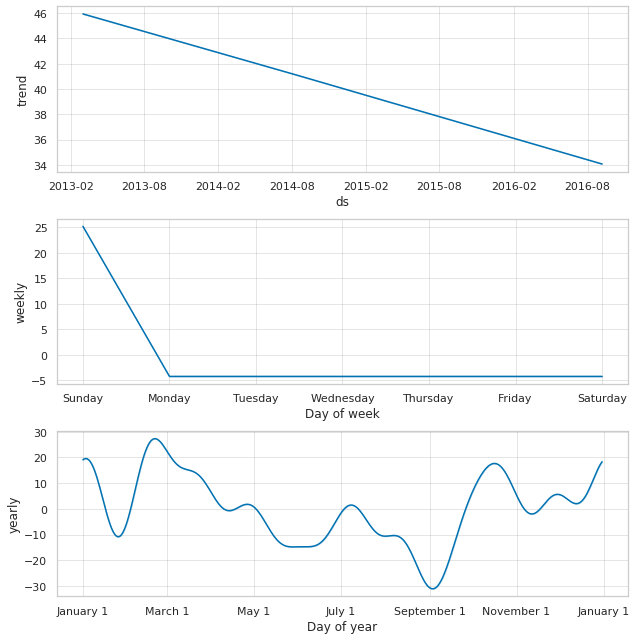

In [44]:
prophet_prediction(weekly_data_Dingling,"Dingling",cols_to_drop_2_5)

cidade Dongsi


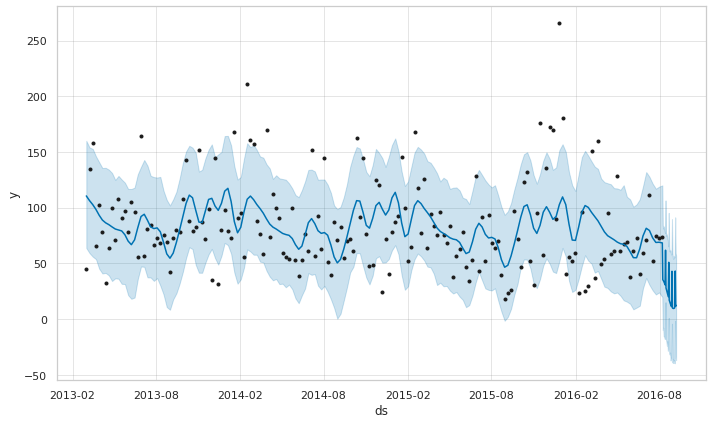

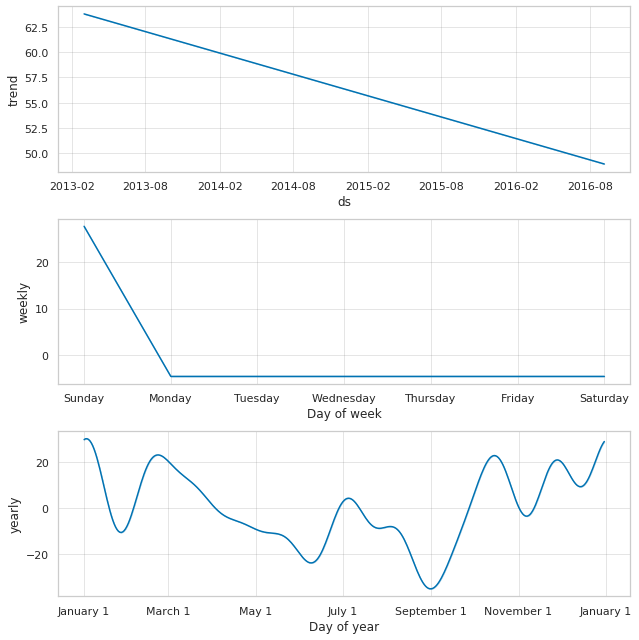

In [45]:
prophet_prediction(weekly_data_Dongsi,"Dongsi",cols_to_drop_2_5)

cidade Guanyuan


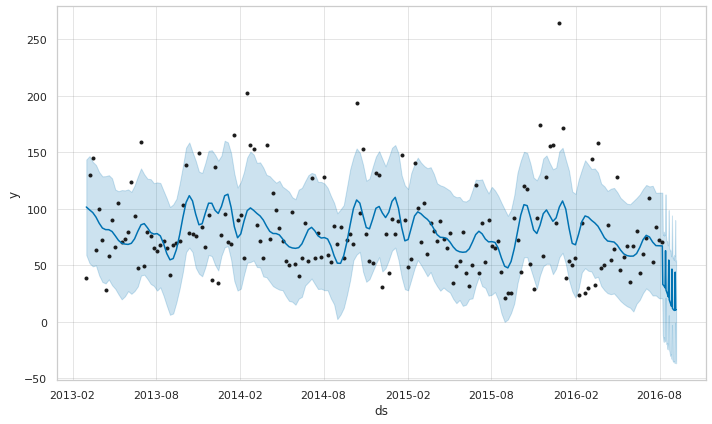

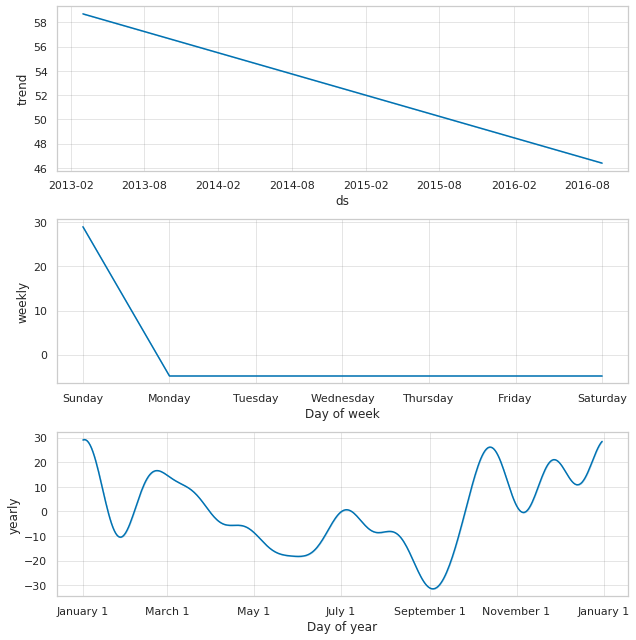

In [46]:
prophet_prediction(weekly_data_Guanyuan,"Guanyuan",cols_to_drop_2_5)

cidade Gucheng


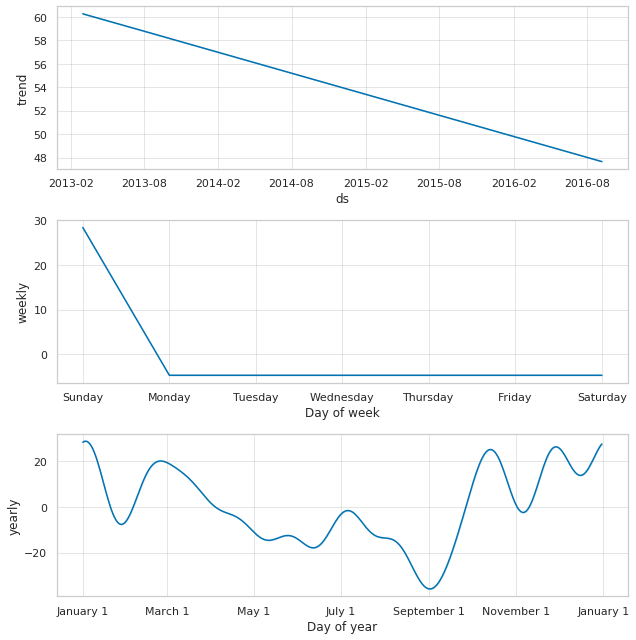

In [47]:
prophet_prediction(weekly_data_Gucheng,"Gucheng",cols_to_drop_2_5)

In [48]:
prophet_prediction(weekly_data_Huairou,"Huairou",cols_to_drop_2_5)

cidade Huairou


cidade Nongzhanguan


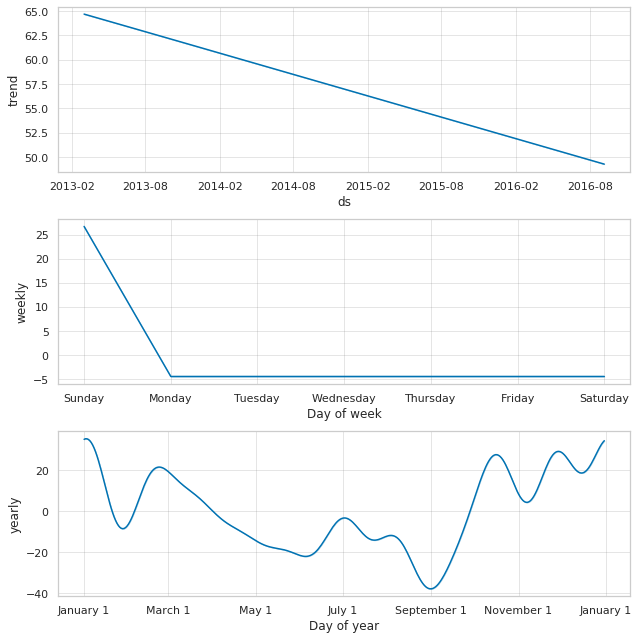

In [49]:
prophet_prediction(weekly_data_Nongzhanguan,"Nongzhanguan",cols_to_drop_2_5)

cidade Shunyi


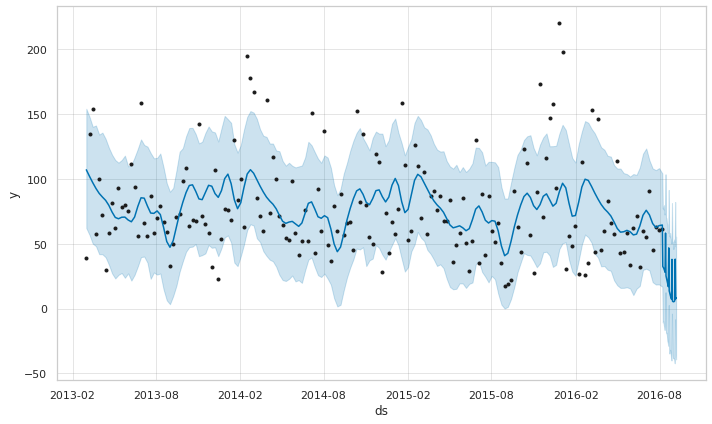

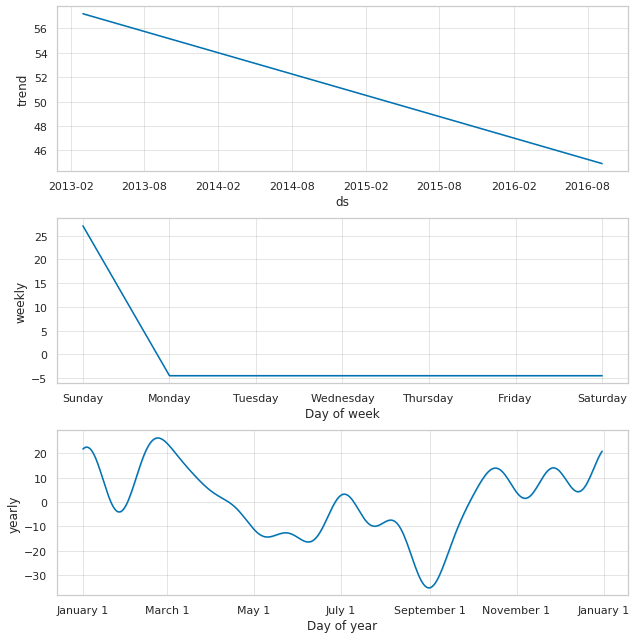

In [50]:
prophet_prediction(weekly_data_Shunyi,"Shunyi",cols_to_drop_2_5)

cidade Tiantan


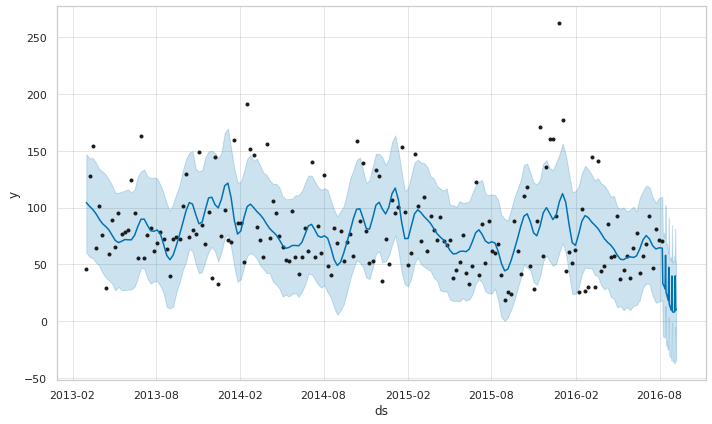

In [51]:
prophet_prediction(weekly_data_Tiantan,"Tiantan",cols_to_drop_2_5)

cidade Wanliu


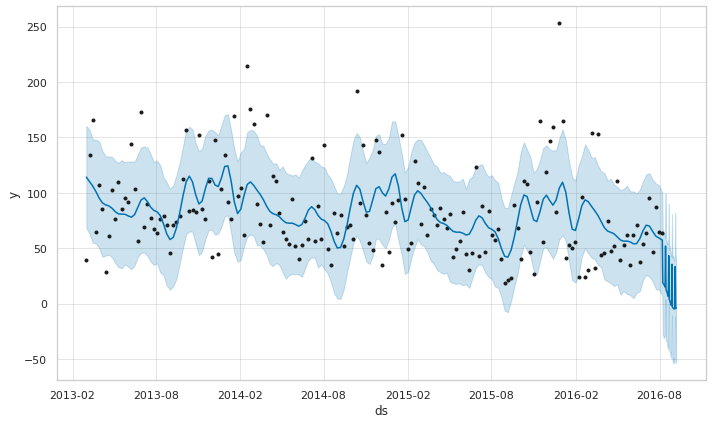

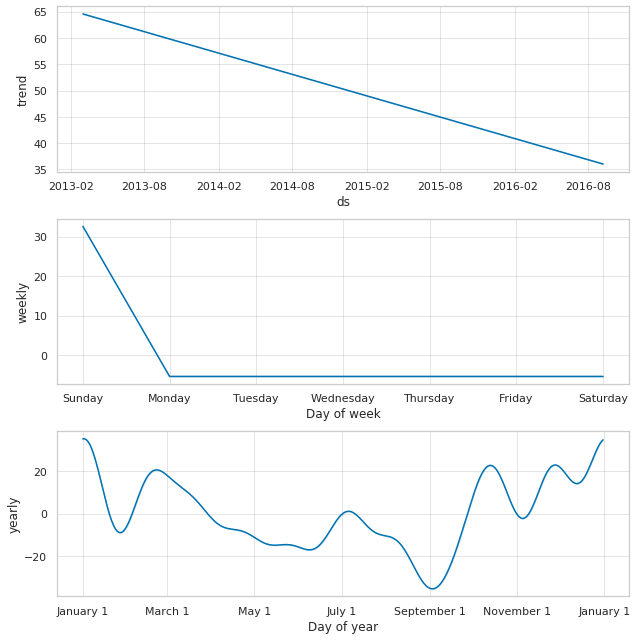

In [52]:
prophet_prediction(weekly_data_Wanliu,"Wanliu",cols_to_drop_2_5)

In [53]:
prophet_prediction(weekly_data_Wanshouxigong,"Wanshouxigong",cols_to_drop_2_5)

cidade Wanshouxigong


Todas cidades mostraram que existe um decaimento da poluição por ano, e pela sazonalidade observa-se que todos tem um valor mínimo em meados de setembro, e o pico deles muda muito conforme cada um, algumas cidades como Changping e Huairou apresentam uma sazonalidade mais "constante" para o final do ano, a cidade de Changping apresenta um maior índice por meados de março. Para saber o que ocasiona essas diferenças é necessário entender como é a cultura de cada cidade, feriados em datas diferenças, entre outros fatores.

Outra coisa para se perceber se existe uma diferença entre as cidades é testar a Null hipótese e a hipótese alternativas, considerando 
* $H_0$ = não existe diferença entre as médias das cidades
* $H_a$ = pelo menos uma cidade apresenta diferença

Podemos fazer um teste ANOVA e determinar com um $\alpha=0.05$

In [54]:
def anova_month(data,city,poluente):
    df = data.groupby(["month","year","station"]).mean()
    df.reset_index(inplace=True)
    df[df.station=="Aotizhongxin"].sort_values(by=["year","month"],inplace=True)
    anova = pd.DataFrame()
    for c in city:
        val = df.loc[df.station==c,poluente].values
        anova[c] = val
    return anova

In [55]:
teste_anova = anova_month(all_data,cidades,"PM2.5")

/home/igor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [56]:
teste_anova

Aotizhongxin   Changping    Dingling      Dongsi    Guanyuan     Gucheng  \
0      95.412634   86.702957   70.310484  104.227151  100.470430  102.643817   
1      91.254167   95.393011   84.919220  100.253495   94.535215   95.074731   
2      68.002688   54.186828   53.303763   69.422043   67.290323   76.349462   
3     115.428763   98.163978   81.411290  126.739247  109.962366  126.346774   
4     141.824405  135.336310  140.494048  146.565476  142.379464  147.919643   
5      85.297619   86.471726   81.007440  108.764881   93.248512   95.122024   
6      44.834770   37.333333   35.303161   43.402299   41.185345   43.372126   
7      71.005952   59.392857   53.555060   75.867560   71.681548   72.495536   
8     110.092742   98.916667   95.705645  108.368280  102.719086  108.841398   
9      98.938172   86.000000   83.338710   99.915323   94.365591   97.913978   
10     87.575538   77.381048   74.522581   93.203360   85.027957   88.304167   
11    100.455645   73.009409   81.666667   98.575269   94.384409   97.705645   
12     62.751389   59.294444   54.950000   65.268056   59.487500   65.372222   
13     96.819444   98.720833   85.836111   89.736111   90.038889   92.836111   
14     74.785417   60.634722   56.027500   76.665278   72.779167   71.926389   
15     66.844444   56.412500   59.966667   75.670833   73.470833   71.593056   
16     84.915323   82.971774   69.849462   91.243280   80.283602   81.911290   
17     71.430914   54.029032   47.334274   64.052285   63.461425   68.672581   
18     59.341398   52.959677   46.032258   60.020161   55.587366   57.823925   
19     53.396505   50.368280   50.202957   63.981183   57.053763   59.862903   
20    106.025000   82.461111   85.273611  105.988889  106.656944  102.802778   
21     59.691667   45.159722   39.951389   57.754167   59.500000   57.062500   
22     62.733333   57.538889   50.533056   66.051389   62.155556   64.597222   
23     57.775000   52.897222   49.159722   61.409722   66.208333   64.698611   
24     68.911290   61.977151   53.418011   73.224462   67.935484   63.448925   
25     93.114247   79.306452   77.933602   99.057796   87.072581   90.905914   
26     66.267473   56.151882   49.486559   69.091398   67.532258   61.598118   
27     71.690860   54.541667   56.844086   75.419355   76.825269   70.103495   
28     62.232527   55.350806   49.791667   64.451613   61.564516   58.684140   
29     68.033602   56.595833   51.741801   69.525134   72.182258   65.162500   
30     46.041667   38.493280   35.086022   49.541667   51.333333   46.490591   
31     46.465054   36.508065   37.254032   51.213710   49.091398   48.272849   
32     79.138889   73.302778   63.059722   85.270833   79.905556   80.241667   
33     70.007361   60.535417   53.884167   67.779028   70.489861   72.184306   
34     51.929167   43.376389   38.252778   54.287500   53.411111   49.638889   
35     56.390278   45.280556   43.411111   61.193056   57.950000   59.966667   
36     95.190860   82.588710   71.814516  101.587366   96.549731   95.950269   
37    125.403226  114.780914  115.755376  116.498656  128.345430  124.276882   
38     78.104839   46.340054   53.084677   80.233871   75.329301   77.661290   
39     85.038978   79.415323   70.478495   92.407258   86.594086   92.415323   
40     77.402778   60.779167   47.306944   83.061111   79.508333   77.359722   
41     93.402222   76.495694   71.380278   81.901528   88.171111   90.371944   
42    121.841667   90.494444   84.511111  125.223611  120.752778  125.341667   
43     99.766667   85.786111   75.645833  108.413889  106.991667  105.079167   
44     76.766129   67.145161   51.829301   85.689516   83.416667   81.302419   
45     56.756720   50.875000   47.008065   53.190323   59.821237   58.254704   
46    153.000000  120.396505  119.049731  161.481183  153.954301  165.043011   
47    132.366935  109.962366   95.009409  149.646505  142.729839  133.845430   

       Huairou  Nongzhanguan      Shunyi     Tiantan      Wanliu  \
0    86.080645 

Para isso a biblioteca scipy.stats já contem um algoritmo para calculo de ANOVA

In [57]:
stats.f_oneway(teste_anova['Aotizhongxin'], teste_anova['Changping'], teste_anova['Dingling'],
               teste_anova['Dongsi'], teste_anova['Guanyuan'], teste_anova['Gucheng'],
               teste_anova['Huairou'], teste_anova['Nongzhanguan'], teste_anova['Shunyi'],
               teste_anova['Tiantan'], teste_anova['Wanliu'], teste_anova['Wanshouxigong'])

F_onewayResult(statistic=3.4815226409819973, pvalue=0.00010081507284872246)

Obtem-se um $F = 3.48$ e um $pvalue = 0.0001$, no caso do F para o anova temos um grau de liberdade entre grupos de 11 (12 cidades -1), e um grau de liberdade dentro do grupo de 228 (total de valores que é 240 menos total de grupos que é 12). Consultando o valor de F para um $\alpha=0.05$ usando scipy temos

In [58]:
stats.f.ppf(q=1-0.05, dfn=11, dfd=228)

1.830818011923943

Logo F-value encontrado de 3.48 está acima do valor crítico de F para esses graus de liberdade que é $F_c = 1.83$, logo a Null hipótese é rejeitada, e pelo menos uma cidade apresenta diferença anual de média e desvio padrão, que olhando a tabela acima, pode-se supor que Changping e Dingling apresentam um menor valor.

## Análise PM10 <a name="pm_10"></a>

### Análise geral <a name="geral_10"></a>

Mesma análise feita do PM2.5 será feita para o PM10

In [59]:
plot_data(weekly_data,"PM10", "Análise todas cidades")

In [60]:
cols_to_drop_10 = ['PM2.5','SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

weekly_data_pm10 = weekly_data.drop(cols_to_drop_10, axis=1)
weekly_data_pm10.head()

PM10
date                  
2013-03-03   54.811343
2013-03-10  173.268849
2013-03-17  165.898313
2013-03-24   77.979167
2013-03-31  129.341022

In [61]:
df = weekly_data_pm10.reset_index()
df.columns = ['ds', 'y']
df.head()

ds           y
0 2013-03-03   54.811343
1 2013-03-10  173.268849
2 2013-03-17  165.898313
3 2013-03-24   77.979167
4 2013-03-31  129.341022

In [62]:
m = Prophet(yearly_seasonality = True, 
            weekly_seasonality=True,
            seasonality_prior_scale=0.1)
m.fit(df)

In [63]:
prediction_size = 14
train_df = df[:-prediction_size]

future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

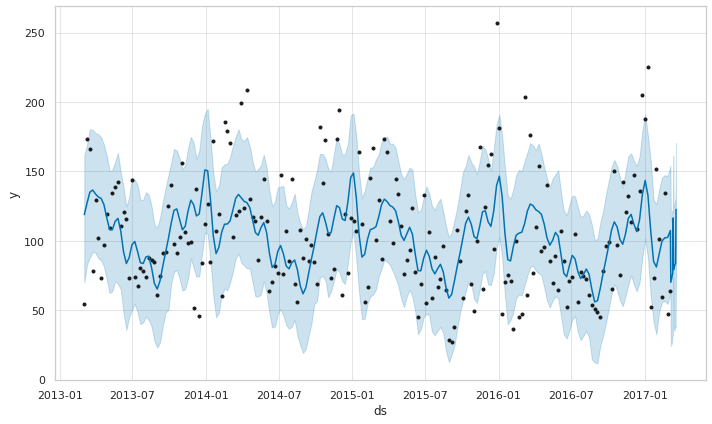

In [64]:
m.plot(forecast);

In [65]:
m.plot_components(forecast);

### Análise por cidade <a name="citys_10"></a>

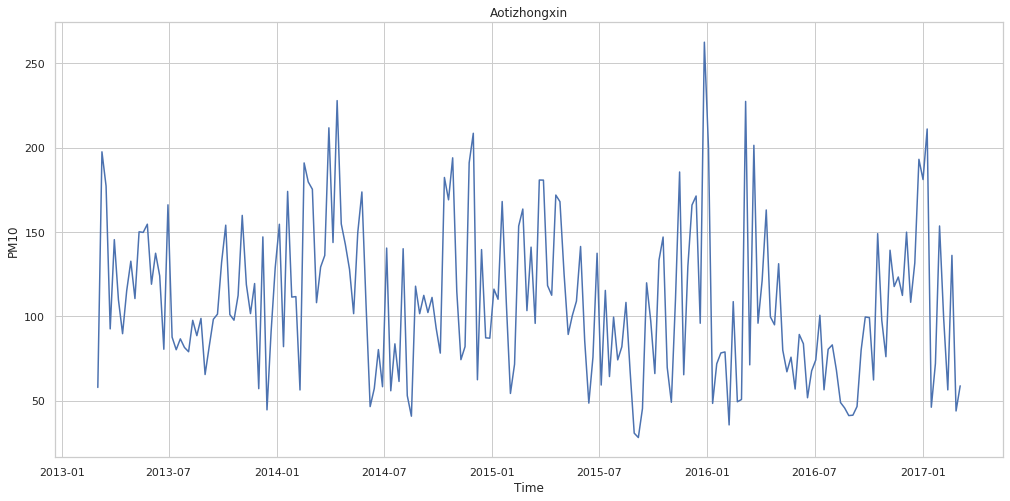

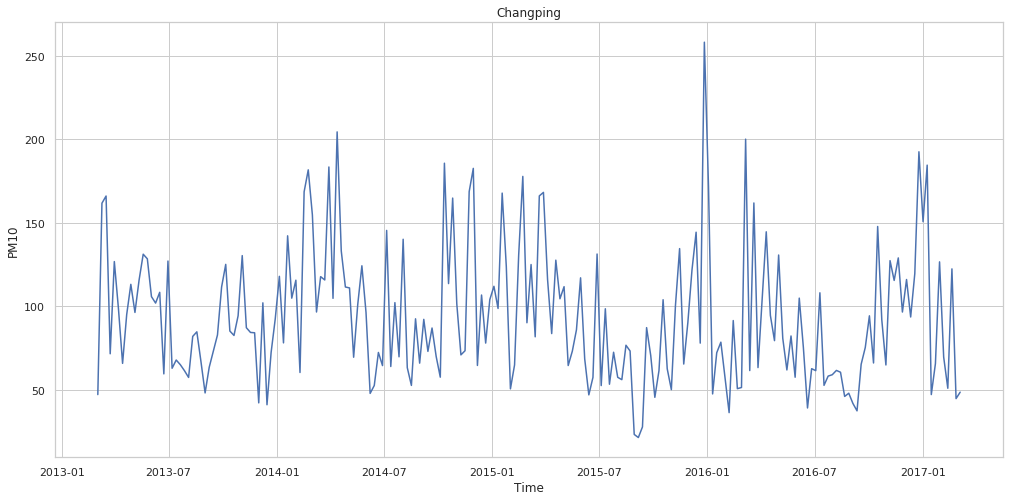

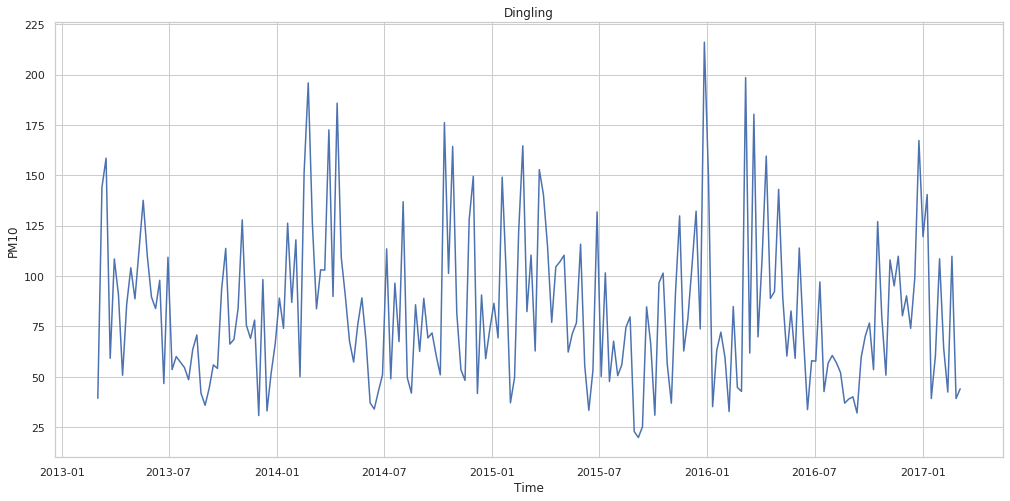

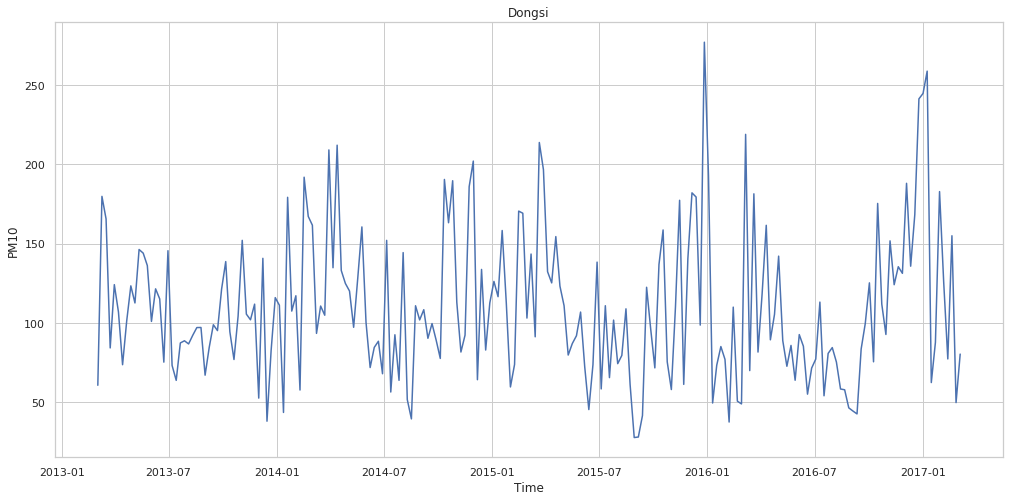

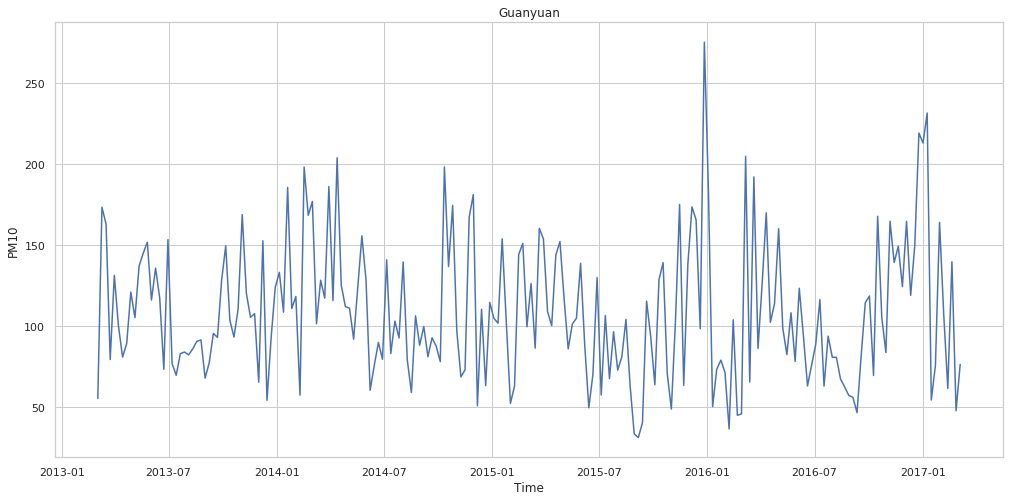

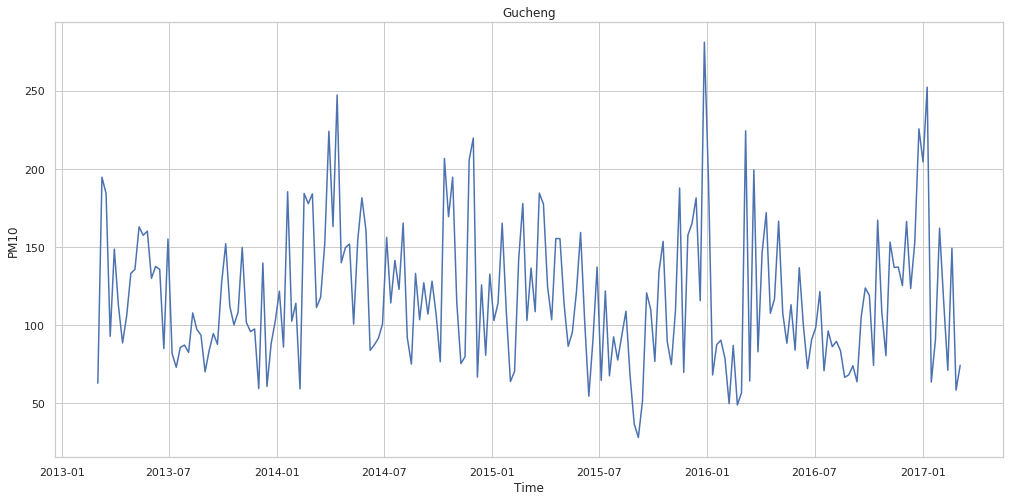

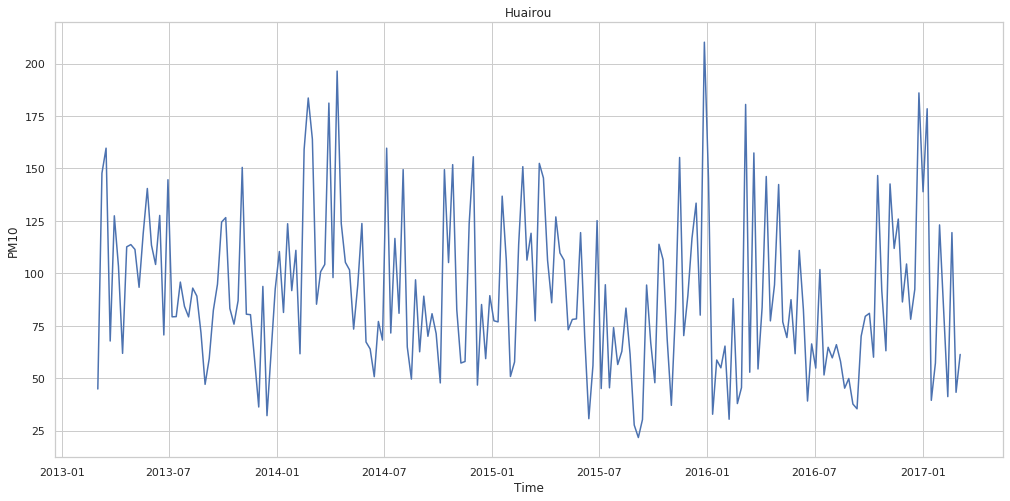

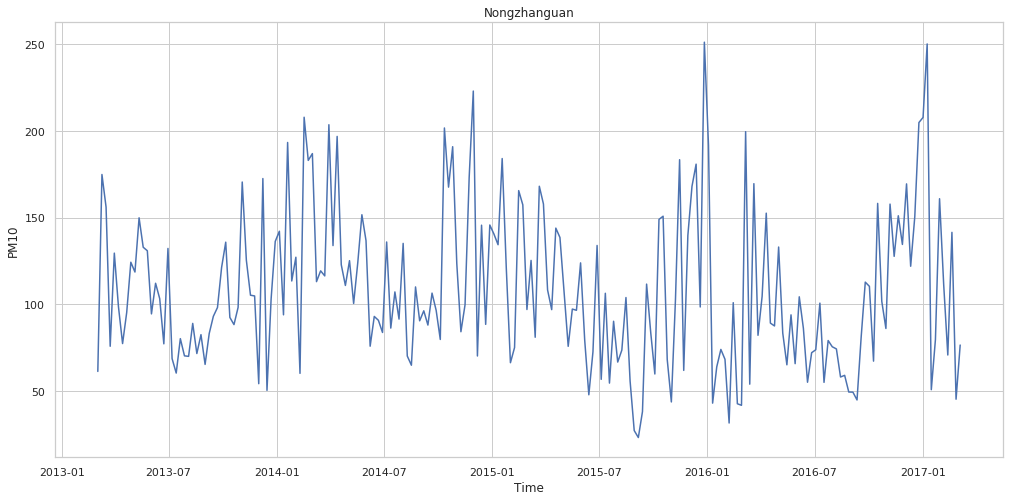

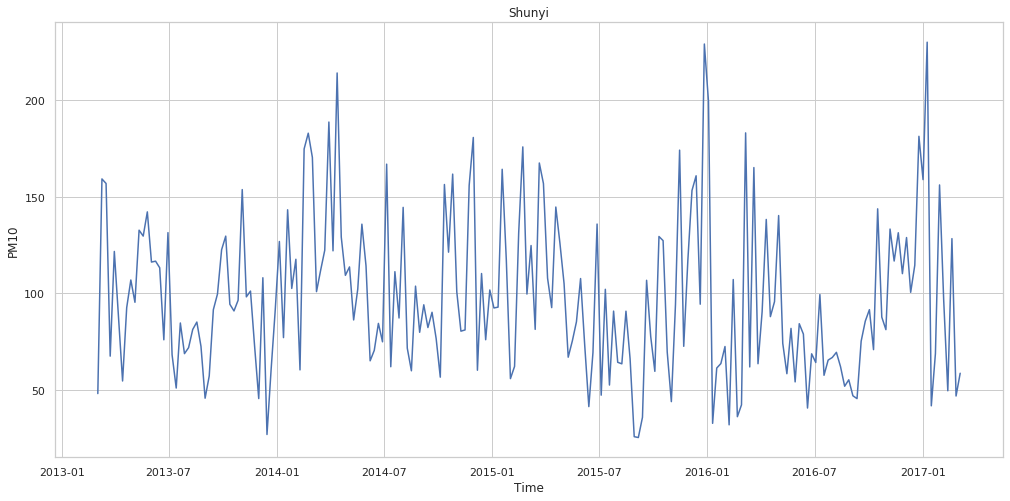

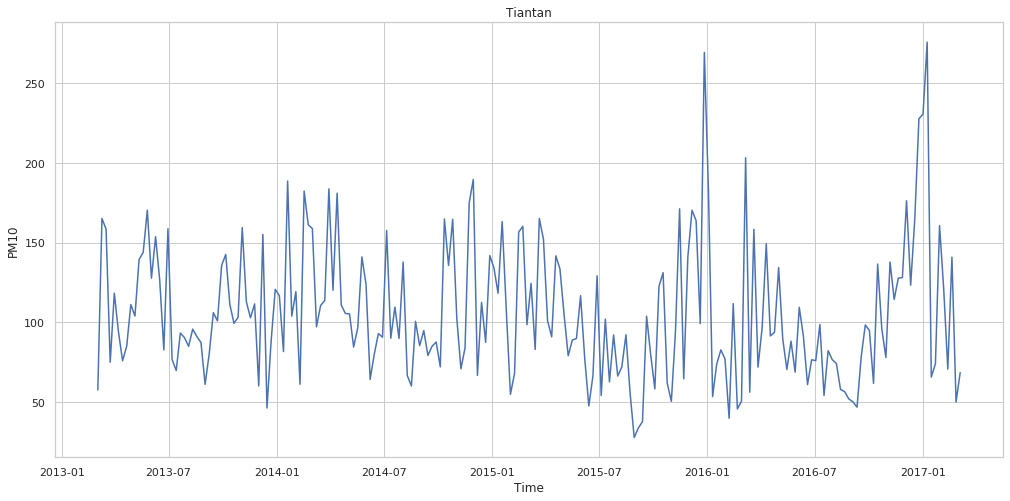

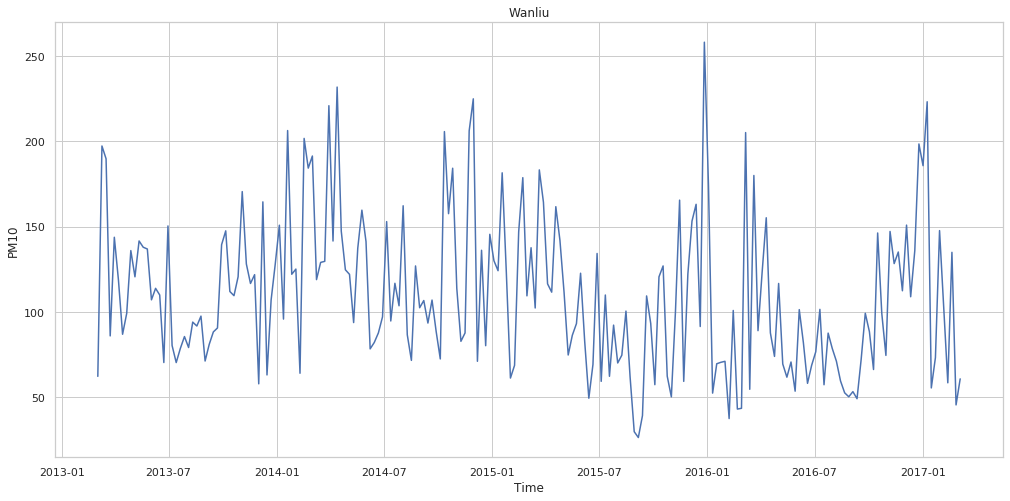

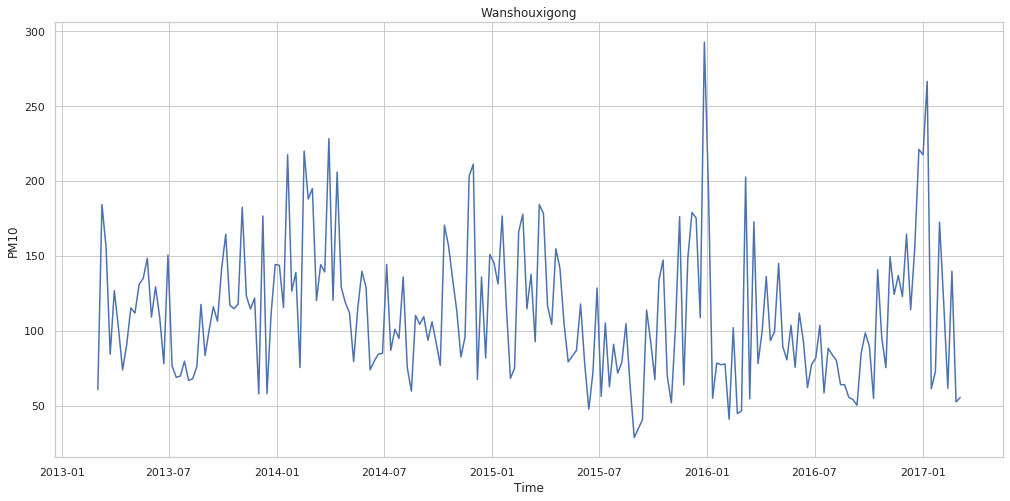

In [66]:
for dado, city in zip(weakly_datas,cidades):
    plot_data(dado,"PM10",city)

cidade Aotizhongxin


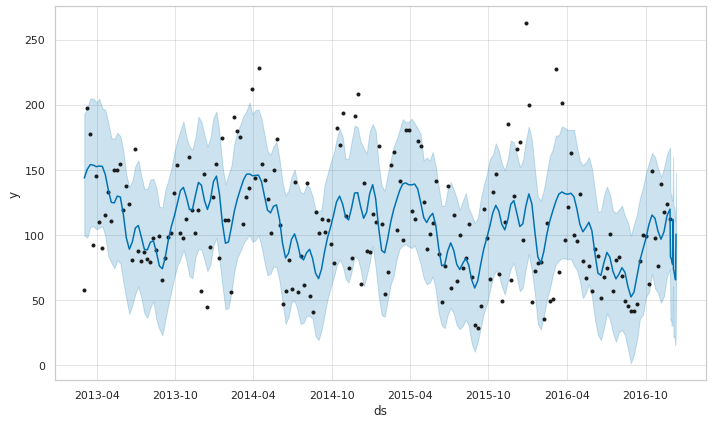

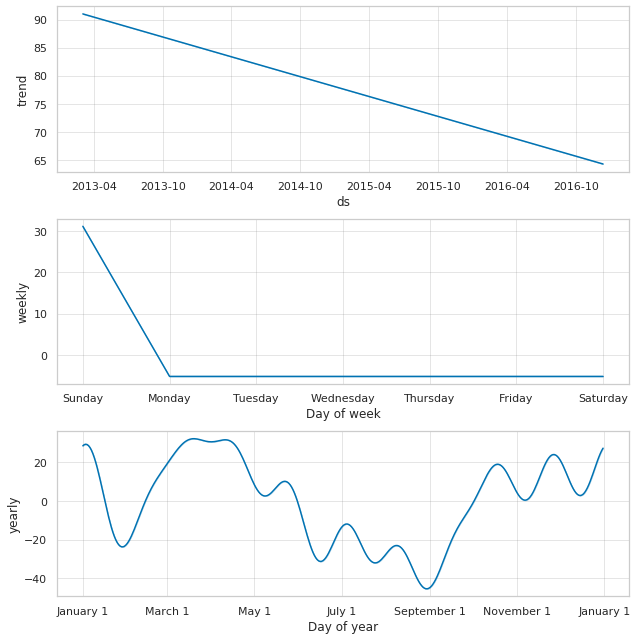

In [67]:
prophet_prediction(weekly_data_Aotizhongxin,"Aotizhongxin",cols_to_drop_10)

cidade Changping


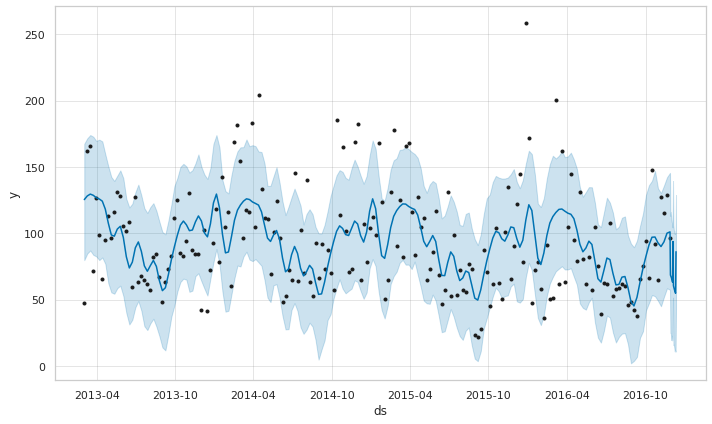

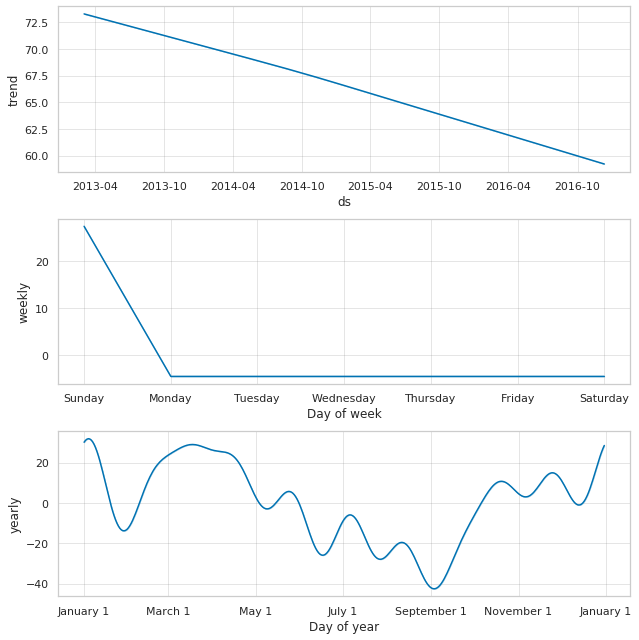

In [68]:
prophet_prediction(weekly_data_Changping,"Changping",cols_to_drop_10)

cidade Dingling


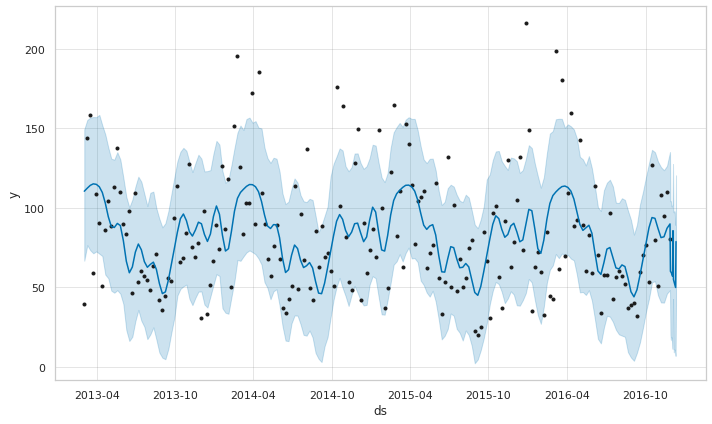

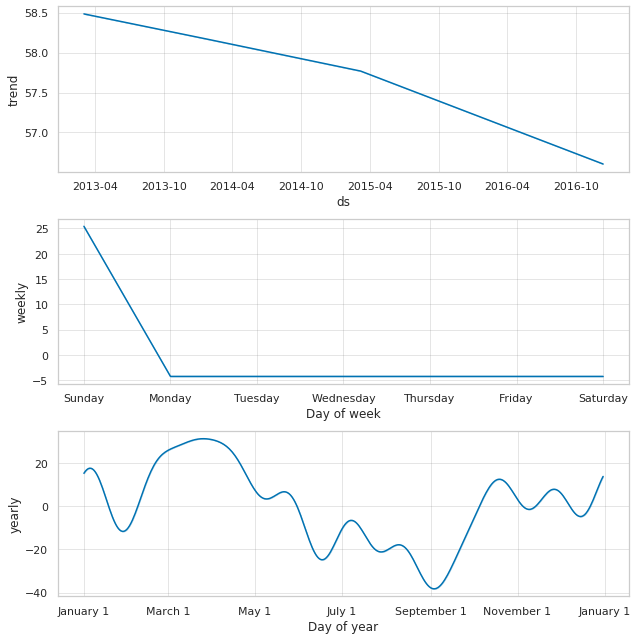

In [69]:
prophet_prediction(weekly_data_Dingling,"Dingling",cols_to_drop_10)

cidade Dongsi


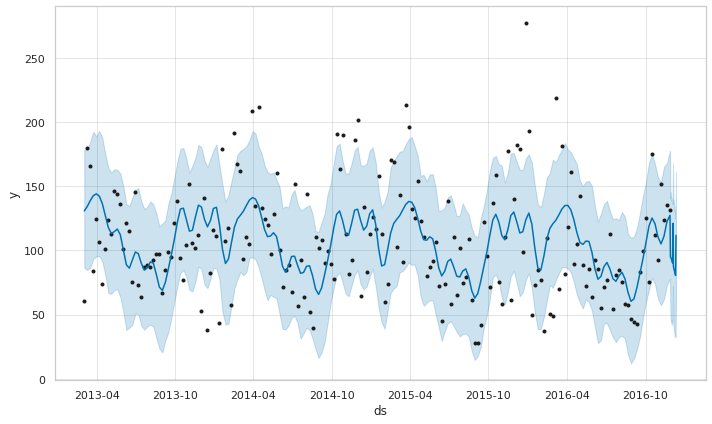

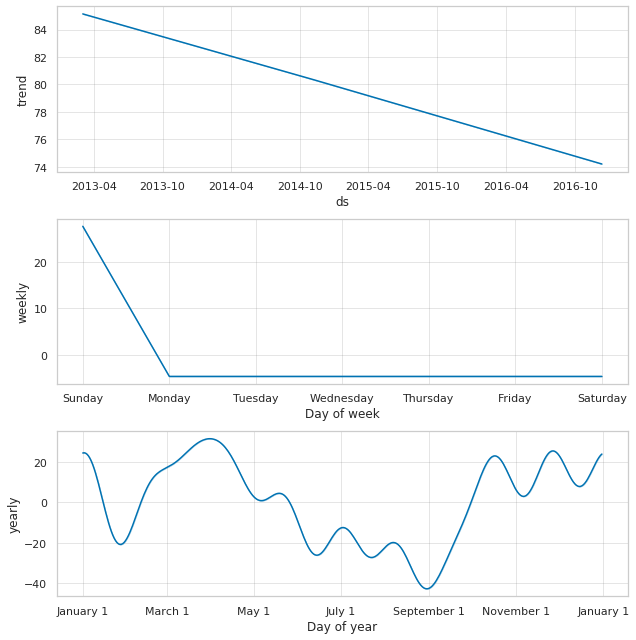

In [70]:
prophet_prediction(weekly_data_Dongsi,"Dongsi",cols_to_drop_10)

cidade Guanyuan


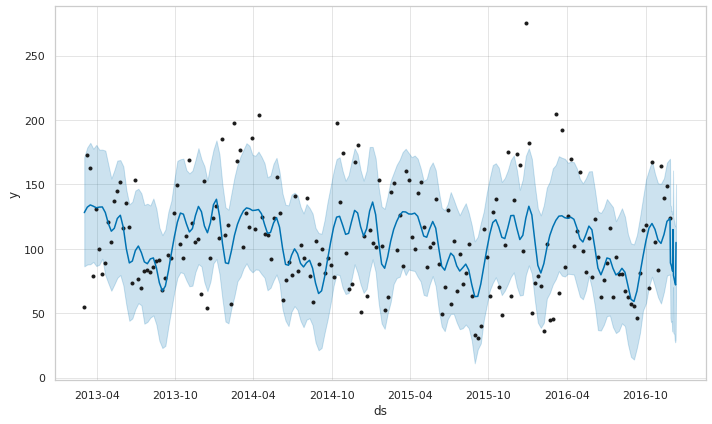

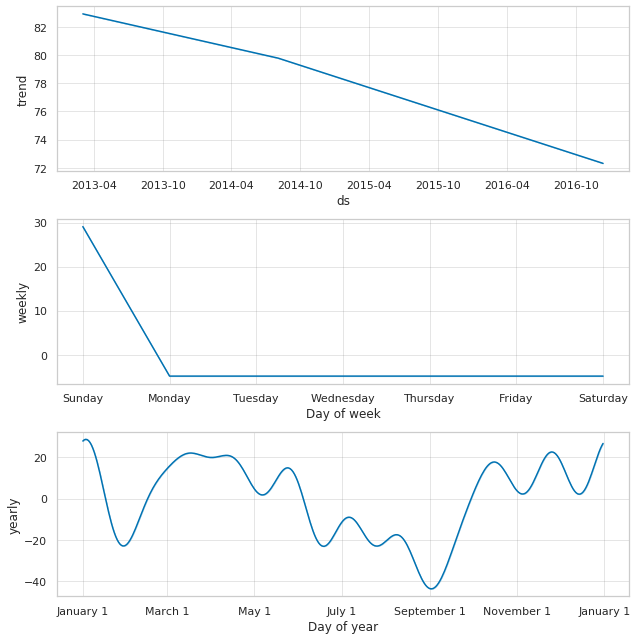

In [71]:
prophet_prediction(weekly_data_Guanyuan,"Guanyuan",cols_to_drop_10)

cidade Gucheng


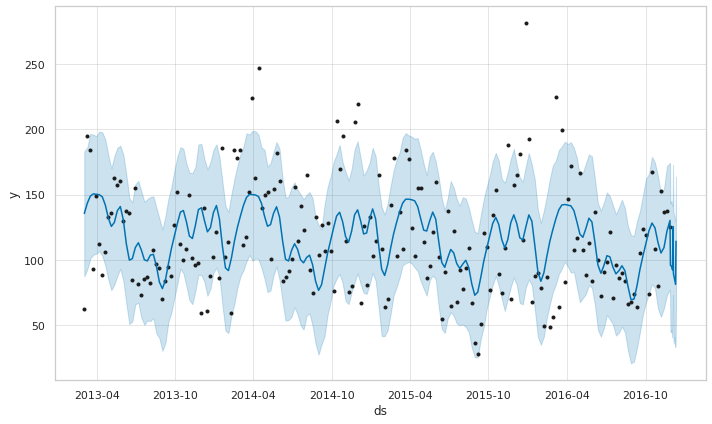

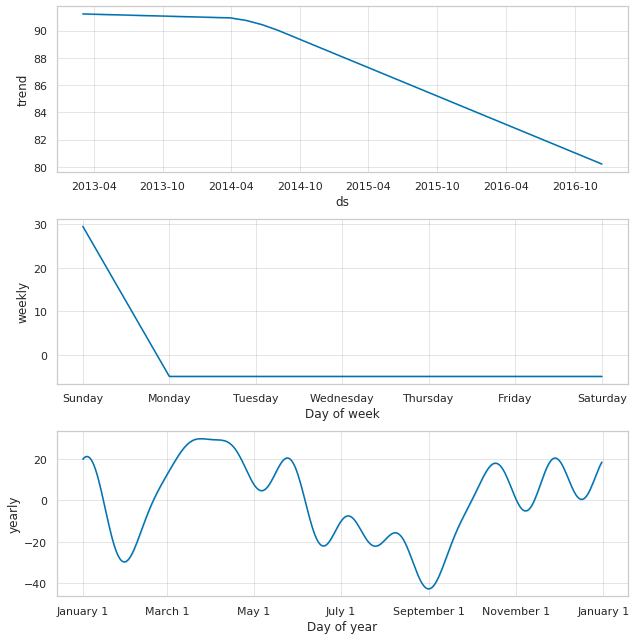

In [72]:
prophet_prediction(weekly_data_Gucheng,"Gucheng",cols_to_drop_10)

cidade Huairou


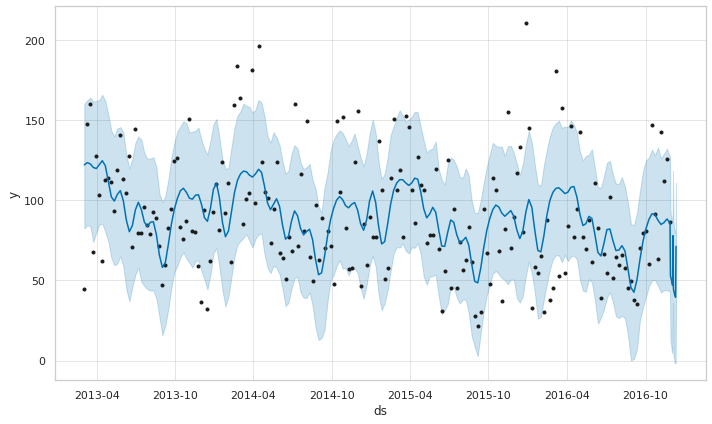

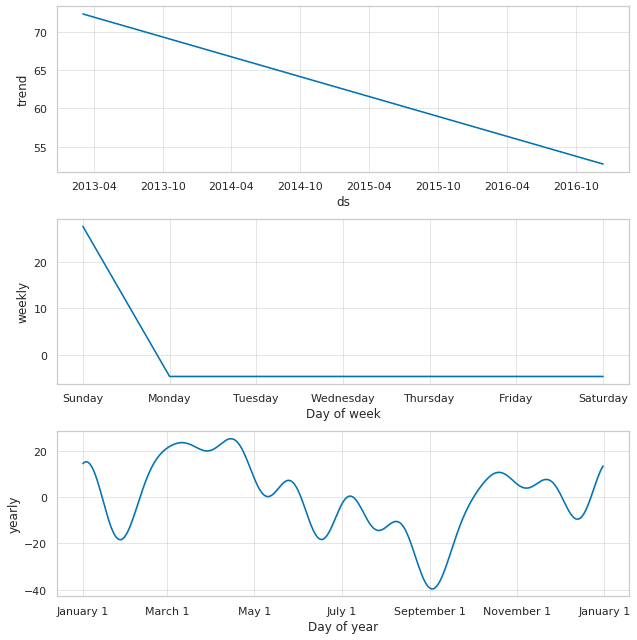

In [73]:
prophet_prediction(weekly_data_Huairou,"Huairou",cols_to_drop_10)

cidade Nongzhanguan


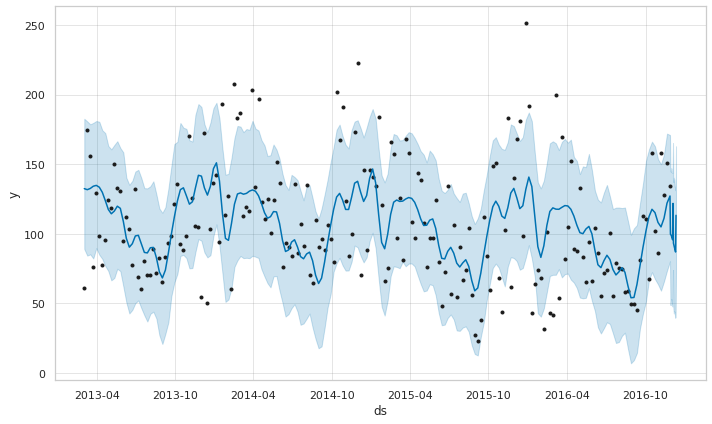

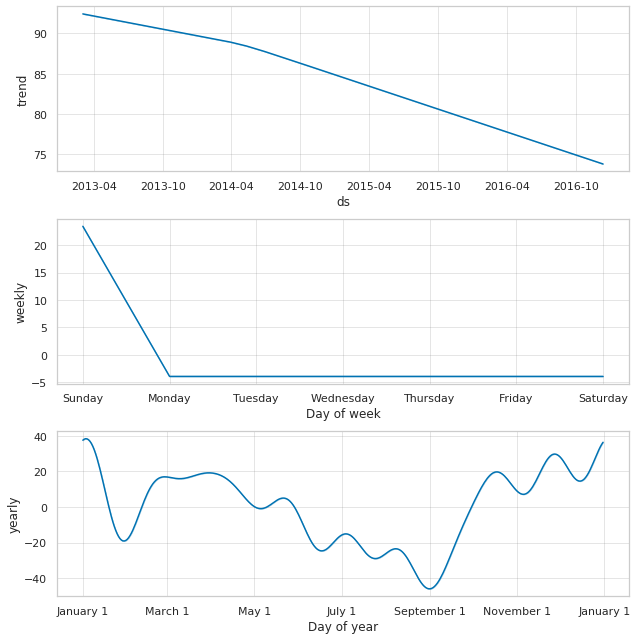

In [74]:
prophet_prediction(weekly_data_Nongzhanguan,"Nongzhanguan",cols_to_drop_10)

cidade Shunyi


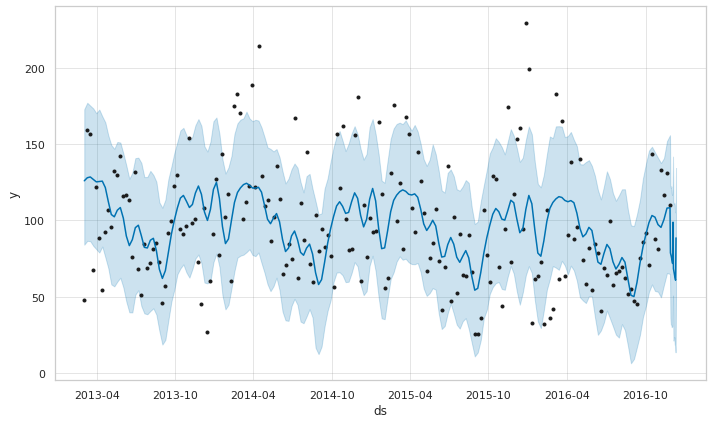

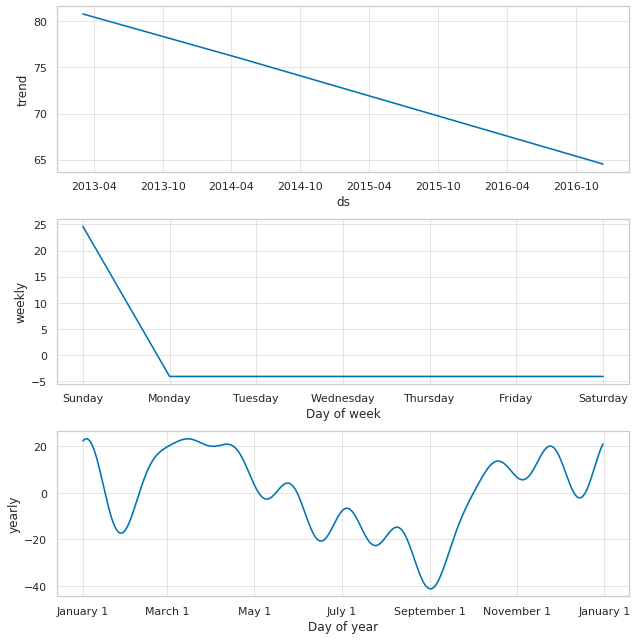

In [75]:
prophet_prediction(weekly_data_Shunyi,"Shunyi",cols_to_drop_10)

cidade Tiantan


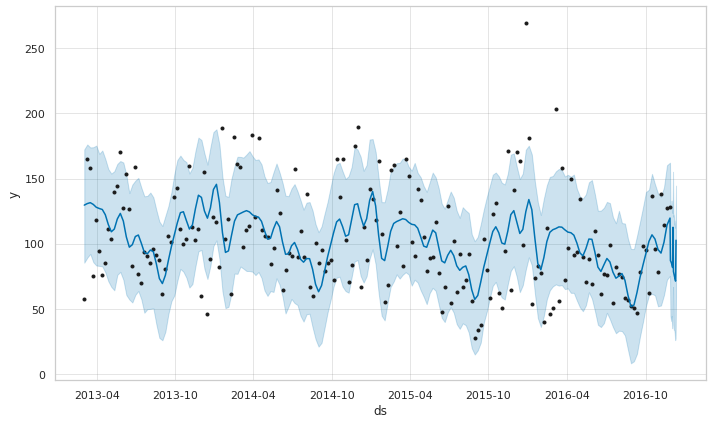

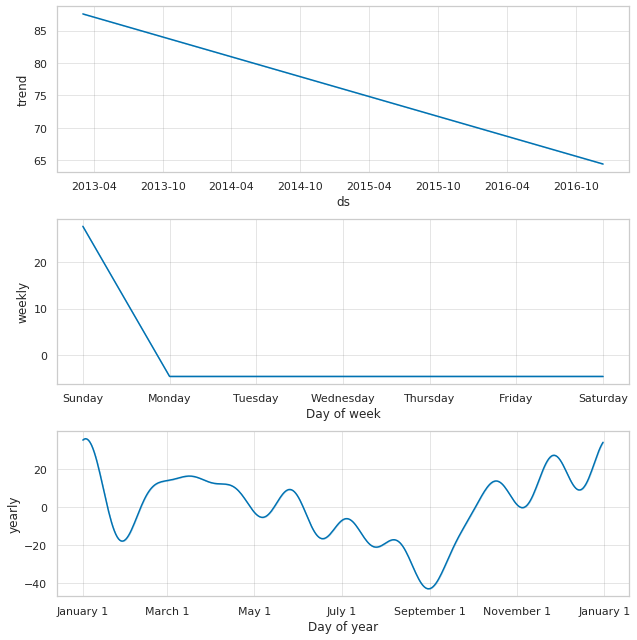

In [76]:
prophet_prediction(weekly_data_Tiantan,"Tiantan",cols_to_drop_10)

cidade Wanliu


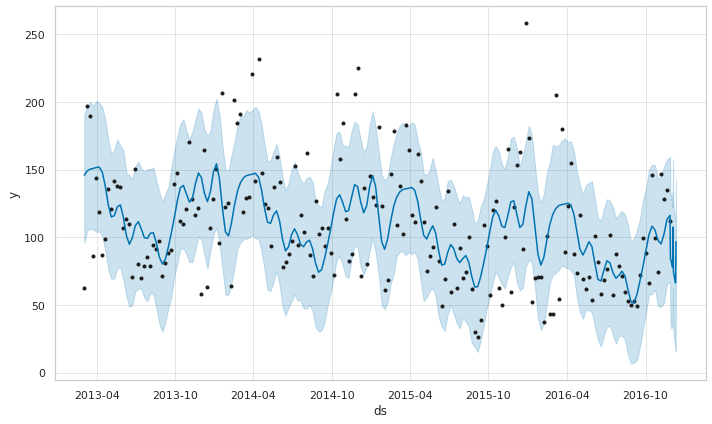

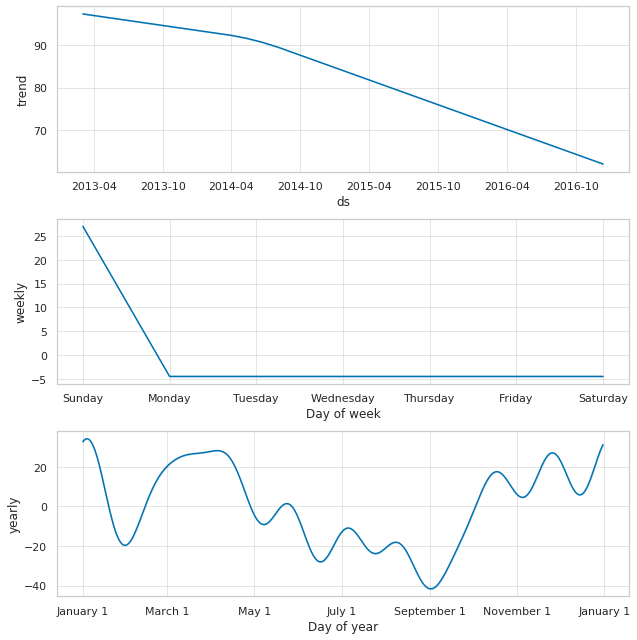

In [77]:
prophet_prediction(weekly_data_Wanliu,"Wanliu",cols_to_drop_10)

cidade Wanshouxigong


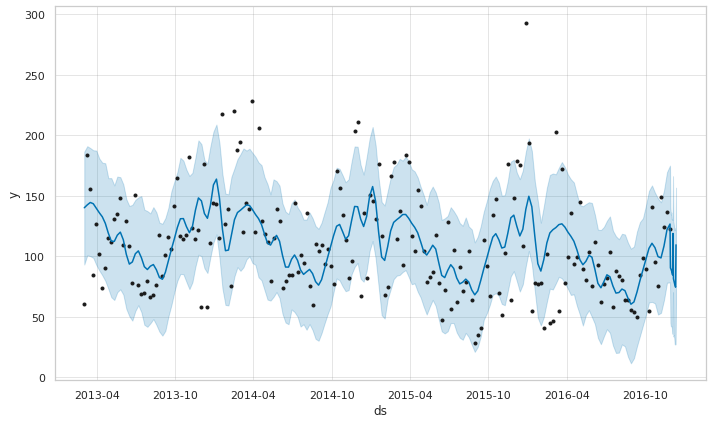

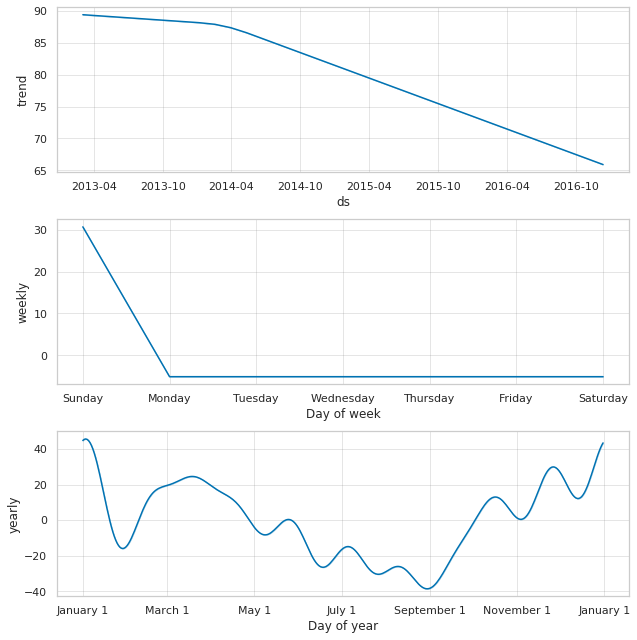

In [78]:
prophet_prediction(weekly_data_Wanshouxigong,"Wanshouxigong",cols_to_drop_10)

In [79]:
teste_anova = anova_month(all_data,cidades,"PM10")

/home/igor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [80]:
stats.f_oneway(teste_anova['Aotizhongxin'], teste_anova['Changping'], teste_anova['Dingling'],
               teste_anova['Dongsi'], teste_anova['Guanyuan'], teste_anova['Gucheng'],
               teste_anova['Huairou'], teste_anova['Nongzhanguan'], teste_anova['Shunyi'],
               teste_anova['Tiantan'], teste_anova['Wanliu'], teste_anova['Wanshouxigong'])

F_onewayResult(statistic=6.273277094175299, pvalue=8.260318843315008e-10)

In [81]:
stats.f.ppf(q=1-0.05, dfn=11, dfd=228)

1.830818011923943

No caso do PM10 o F-value foi maior que a do PM2.5, mostrando que existe uma maior variabilidade entre cidades, e também nesse caso a null hipótese é rejeitada, considerando que pelo menos uma cidade apresenta diferença nos dados.

# Conclusão <a name="conclusão"></a>

As análises estatísticas mostraram que as cidades apresentam uma diminuição anual na quantidade de poluentes, tanto do PM2.5 quanto do PM10, e em todas apresentaram, para ambos os poluentes, meses na qual existe uma maior quantidade de poluentes no ar, sempre perto do final do ano, e também apresentaram um menor índice em meados de setembro.

Outra análises feita é que nem todas cidades apresentam o mesmo comportamento em relação a quantidade de poluêntes no ar, como pode ser visto através do ANOVA.